# Coursera Capstone Project

## The Battle of Neighborhoods Buenos Aires Edition. (Week 1 and 2)

In [2]:
import os
import io
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import geopandas as gpd
import descartes
#import pysal as ps
import geopy ## To get the points for our neighborhoods
import folium

import requests # library to handle requests

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# import k-means from clustering stage
from sklearn.cluster import KMeans

#Beatiful Soup
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

# glob
import glob

# REGEX
import re

print("All packages imported")

All packages imported


In [ ]:
os.getcwd()

Capstone Project - The Battle of Neighborhoods, Buenos Aires edition. 

### Brief description of Buenos Aires.


Buenos Aires, also known as Autonomous City of Buenos Aires, is the capital and largest city of Argentina with almost 3 million inhabitants (2,890,151 according to the 2010 census). The city is located on the western shore of the estuary of Río de la Plata, on the South American continent’s southeastern coast. The “Greater Buenos Aires” which includes also several Buenos Aires Province districts, constitutes the fourth-most popolus metropolitan area in the Americas, with a population of around 17 million, and one of the 20th biggest cities in the world. The city is historically divided into 48 barrios (neighborhoods) and a newer scheme has divided it into 15 comunas (communes) mainly for political elections purposes.  


Buenos Aires is a cosmopolitan city and it’s also well known for it’s preserved Eclectic European Architecture and rich cultural life.  Strongly influenced by European culture, Buenos Aires is sometimes referred to as the “Paris of South America”. The city has the busiest live theater industry in Latin America, and it’s the home the Teatro Colón, an internationally rated opera house. 


Buenos Aires is the financial, industrial and commercial hub of Argentina. The economy in the city proper alone, measured by Gross Geographic Product (adjusted for purchasing power), totaled US\\$84.7 billion (US\\$34,200 per capita) in 2011 and amounts to nearly a quarter of Argentina’s as a whole.


Football is a passion for Argentines. Buenos Aires has the highest concentration of football teams of any city in the world (featuring no fewer than 24 professional football teams), with many of it’s teams playing in the major league. The best-known rivalry is the one between River Plate and Boca Juniors (09/12/2018†), the match is better known as Superclásico. Watching a match between these two teams was deeemed one of the “50 sporting things you must do before you die” by The Observer. The best Superclásico ever was  the historically final of the Copa Libertadores Championship, held on Santiago Bernabeu stadium on the 9th of december of 2018. River Plate won  3-1 and was crowned as the Copa Libertadores Champion.

### Problem description.
Since the city is very populous and Traffic is usually terribly heavy, specially on working hours, people who lives in the city often likes to be close to work. Also, having parks, pharmacies, coffee-shops on other stores around is usually considered a plus. Buenos Aires is a relatively safe city to live if you compare it with other cities in Argentina and Latin America, but that does not mean that you don’t have to worry about security. On the contrary, is a issue that can not be avoided when moving around the city and choosing a neighborhood to live on. 


Also rental prices are always a factor and there is much variation between neighborhoods.
For the purpose of moving to another neighborhood, you may need a first approach which could tell you where to start looking and make your search more straight forward. It would be great to have a report that can tell you which neighborhoods are most similar and which neighborhood meets your conditions the most. 


The aim of this report is to analyze the barrios of Buenos Aires city, so I can decide where to move since I ‘ve been ofered a new position as a Data Scientist. I would have to work at Núñez Neighborhood if I accept it and I currently live on Boedo with my wife and kid. My wife likes the idea to moving towards Núñez because she is familiar with the sorroundings, and she would have her friends and relatives closer. In order to move, I would have to find an apartment with the following aspects:
* Apartment with 2 bedrooms with monthly rent <= $\\50.000 Argentinan Pesos. 
* Apartment located within approximately 1 km from a subway station in Buenos Aires. I go to work by mororcycle, so I don't use the subway very often, but it's must when it rains or in the coldest days of winter.
* Neighborhood with low crime rate.
* Area with venues similar to the ones described for current location.
    
    
Also, I will group Neighborhoods into similar clusters (using only the venues). That information can be used to find out neighborhoods that are same as your current neighborhood or at least similar. This information would be useful for people who are interested in relocating to a different part of the city and are interested in finding new neighborhoods that have similar venues to the ones in their current neighborhood.

### Data Description. 


For this project we will use the data listed below:


**DATASETS**

1-  _Buenos Aires open data website_ (https://data.buenosaires.gob.ar/)

    A) barrios.csv  - Localization and geographical limits of city neighborhoods.
    B) bocas-de-subte.csv – subway stations localization.
    C) delitos_2019.csv – Localization of each crime registered in the city in 2019.
    D) caba_pob_barrios_2010.csv – Population by Neighborhood.

2- _Mercadolibre_ (https://www.mercadolibre.com.ar)

    E) url0.csv to url24.csv – Since the Buenos Aires open data website has a data set about rental prices with more than 5000 missing values, it is useless for our purpose. To amend this we scrapped Mercadolibre web site and extracted with all the relevant information about two bedroom apartment rental notices in 25 csv files. 


3- _Open Street Data API_

    We will request other data that can not be found in Buenos Aires Open Data website, like neighborhoods longitude and latitude coordinates.


4- _Foursquare API_

    We will locate different venues for the analyzed neighborhoods.

### How the data will be used to solve the problem

I will first load, clean and add variables to the data. I will be saving all the generated datasets for later use in the Section N#2

After Data Wrangling is done, the data will be used as follows: 

Use Foursquare and geopy data to map top 10 venues for all Buenos Aires neighborhoods and clustered in groups.

Use Buenos Aires Open Data to map the location of subway stations, separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately.

Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations. create a map that depicts, for instance, the average rental price per square ft, around a radious of 1.0 mile (1.6 km) around each subway station - or a similar metrics. I will be able to quickly point to the popups to know the relative price per subway area. Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim. Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro New York MTA, etc.

# Part 1 - Data Wrangling

**I downloaded all the needed data to my hard drive. If you fell like reading the data directly from the wb you can use the \# commands**

In [5]:
# Get the data from the website
barrios = gpd.read_file('./Data/barrios.csv')
#url="http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.csv"
#s=requests.get(url).content
#barrios=pd.read_csv(io.StringIO(s.decode('utf-8')))
barrios.head()

,WKT,barrio,comuna,perimetro,area,geometry
0,"POLYGON ((-58.4528200492791 -34.5959886570639,...",CHACARITA,15,7724.85295457,3115707.10627,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5..."
1,"POLYGON ((-58.4655768128541 -34.5965577078058,...",PATERNAL,15,7087.51329533,2229829.03363,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
2,"POLYGON ((-58.4237529813037 -34.5978273383243,...",VILLA CRESPO,15,8131.85707532,3615977.55634,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
3,"POLYGON ((-58.4946097568899 -34.6148652395239,...",VILLA DEL PARQUE,11,7705.38979708,3399595.64148,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
4,"POLYGON ((-58.4128700313089 -34.6141162515854,...",ALMAGRO,5,8537.90136849,4050752.24524,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."


In [6]:
barrios.drop(labels=['WKT'], axis=1, inplace=True)
type(barrios)

geopandas.geodataframe.GeoDataFrame

In [7]:
barrios.dtypes

barrio         object
comuna         object
perimetro      object
area           object
geometry     geometry
dtype: object

In [8]:
#fix area and perimetro and round 
barrios['perimetro'] = barrios['perimetro'].astype(float)
barrios['area'] = barrios['area'].astype(float)
barrios['perimetro']=barrios['perimetro'].round(2)
barrios['area']=barrios['area'].round(2)
barrios.head()

,barrio,comuna,perimetro,area,geometry
0,CHACARITA,15,7724.85,3115707.11,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5..."
1,PATERNAL,15,7087.51,2229829.03,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
2,VILLA CRESPO,15,8131.86,3615977.56,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
3,VILLA DEL PARQUE,11,7705.39,3399595.64,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
4,ALMAGRO,5,8537.90,4050752.25,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."


In [9]:
barrios.dtypes

barrio         object
comuna         object
perimetro     float64
area          float64
geometry     geometry
dtype: object

In [10]:
barrios.sort_values(by='area', ascending=False).head()

,barrio,comuna,perimetro,area,geometry
33,PALERMO,14,22126.53,15845871.29,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5..."
18,VILLA LUGANO,8,15057.47,9296142.36,"POLYGON ((-58.46571 -34.65903, -58.46519 -34.6..."
35,VILLA SOLDATI,8,12441.70,8688163.56,"POLYGON ((-58.44913 -34.65117, -58.44883 -34.6..."
9,FLORES,7,15772.44,8590784.13,"POLYGON ((-58.46041 -34.65680, -58.46090 -34.6..."
43,BELGRANO,13,20609.78,7999239.81,"POLYGON ((-58.45057 -34.53561, -58.45066 -34.5..."


In [11]:
barrios[['comuna','barrio']].describe()

,comuna,barrio
count,48,48
unique,15,48
top,10,VILLA LUGANO
freq,6,1


In [12]:
barrios.loc[20:25,'barrio']

20             SAAVEDRA
21              COGHLAN
22        VILLA URQUIZA
23           COLEGIALES
24            BALVANERA
25    VILLA GRAL. MITRE
Name: barrio, dtype: object

In [13]:
barrios.isnull().sum()

barrio       0
comuna       0
perimetro    0
area         0
geometry     0
dtype: int64

In [14]:
### Fix VILLA GRAL. MITRE <- VILLA GENERAL MITRE
#barrios.iloc[25, barrios.columns.get_loc('barrio')] = 'VILLA GENERAL MITRE'
barrios.loc[25, 'barrio'] = 'VILLA GENERAL MITRE'
barrios.loc[25,] #check

barrio                                     VILLA GENERAL MITRE
comuna                                                      11
perimetro                                              6290.44
area                                               2.16228e+06
geometry     POLYGON ((-58.4713995731534 -34.6190380529955,...
Name: 25, dtype: object

 #### Now we can download the localization data (latitude and longitude) of each neighborhood, but first we got to set NOMINATIM so we can use the service within it's own rules and user agreement. 

In [15]:
# Set Nominatim
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
Nom = Nominatim(user_agent='user_agent') #define user agent
from geopy.extra.rate_limiter import RateLimiter # Be a good user and respect the user agreement from open streets
geocode = RateLimiter(Nom.geocode, min_delay_seconds=1.5)

In [16]:
#Test 
country = 'Argentina'
city = "Ciudad de Buenos Aires"
barrio = 'VILLA GENERAL MITRE'
loc= Nom.geocode(city+','+ barrio)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)
#list=[]
#for i in barrios['barrio']:
 #   loc=Nom.geocode(city+','+ barrio)
  #  list.append(loc)
#list
a, y = loc.latitude, loc.longitude

latitude is :- -34.6103098 
longtitude is:- -58.4693142


In [17]:
loc.address

'Villa General Mitre, Buenos Aires, Comuna 11, Ciudad Autónoma de Buenos Aires, Argentina'

#### We need to get the geoposition of each neighborhood, since we only got the polygonal data from de oficial data repository. To get those, we use open street API (Nominatim). Sometimes there is a timeout error. I think it's just a server error, so run it again.

In [18]:
#Create 3 list for each element: location, latitude, longitude
location=[]
latitude=[]
longitude=[]
# define the variables too loop for
city = "Ciudad de Buenos Aires"
bar = barrios['barrio']

#for loop
for i in bar:
    loc=Nom.geocode(city+','+ i)
    try:        
        location.append(loc.address)
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
        print(loc.address)
    except:
        location.append('error')
        latitude.append('error')
        longitude.append('error')
    continue

# make a dataframe
barrios_points = {'Location':location, 'Latitude':latitude, 'Longitude':longitude}
barrios_points = pd.DataFrame(barrios_points)
barrios_points.head()

Chacarita, Buenos Aires, Comuna 15, Ciudad Autónoma de Buenos Aires, Argentina
La Paternal, Buenos Aires, Comuna 15, Ciudad Autónoma de Buenos Aires, Argentina
Villa Crespo, Buenos Aires, Comuna 15, Ciudad Autónoma de Buenos Aires, Argentina
Villa del Parque, Buenos Aires, Comuna 11, Ciudad Autónoma de Buenos Aires, Argentina
Almagro, Buenos Aires, Comuna 5, Ciudad Autónoma de Buenos Aires, Argentina
Caballito, Buenos Aires, Comuna 6, Ciudad Autónoma de Buenos Aires, Argentina
Villa Santa Rita, Buenos Aires, Comuna 11, Ciudad Autónoma de Buenos Aires, Argentina
Monte Castro, Buenos Aires, Comuna 10, Ciudad Autónoma de Buenos Aires, Argentina
Villa Real, Buenos Aires, Comuna 10, Ciudad Autónoma de Buenos Aires, Argentina
Flores, Buenos Aires, Comuna 7, Ciudad Autónoma de Buenos Aires, Argentina
Floresta, Buenos Aires, Comuna 10, Ciudad Autónoma de Buenos Aires, Argentina
Constitución, Buenos Aires, Comuna 1, Ciudad Autónoma de Buenos Aires, Argentina
San Cristóbal, Buenos Aires, Comuna 

,Location,Latitude,Longitude
0,"Chacarita, Buenos Aires, Comuna 15, Ciudad Aut...",-34.588,-58.4542
1,"La Paternal, Buenos Aires, Comuna 15, Ciudad A...",-34.5977,-58.4702
2,"Villa Crespo, Buenos Aires, Comuna 15, Ciudad ...",-34.5984,-58.4425
3,"Villa del Parque, Buenos Aires, Comuna 11, Ciu...",-34.6048,-58.4938
4,"Almagro, Buenos Aires, Comuna 5, Ciudad Autóno...",-34.61,-58.4222


In [19]:
print('Locations length: ',len(location))
print('Latitude length: ', len(latitude))
print('Longitude length', len(longitude))

Locations length:  48
Latitude length:  48
Longitude length 48


In [20]:
#Save collected data
#barrios_points.to_csv('./Data/barrios_points.csv', index=False)
#barrios_points = pd.read_csv('./Data/barrios_points.csv')

Now we are going to concatenate Lat and Long for each Neighborhood

In [21]:
#Get the data in diferent columns
barrios_geo = barrios_points['Location'].str.split(pat=",", n=4, expand=True)
#drop columns that we don't need
barrios_geo.columns = barrios_geo.columns.astype(str)
barrios_geo.drop(labels=['1','3','4'], inplace=True, axis=1)
barrios_geo.head()

,0,2
0,Chacarita,Comuna 15
1,La Paternal,Comuna 15
2,Villa Crespo,Comuna 15
3,Villa del Parque,Comuna 11
4,Almagro,Comuna 5


In [22]:
# concatenate latitude and longitude
barrios_geo['Latitude']= barrios_points['Latitude']
barrios_geo['Longitude']= barrios_points['Longitude']
barrios_geo.head()

,0,2,Latitude,Longitude
0,Chacarita,Comuna 15,-34.588,-58.4542
1,La Paternal,Comuna 15,-34.5977,-58.4702
2,Villa Crespo,Comuna 15,-34.5984,-58.4425
3,Villa del Parque,Comuna 11,-34.6048,-58.4938
4,Almagro,Comuna 5,-34.61,-58.4222


In [23]:
# Rename columns 0 and 2. 
barrios_geo.rename(columns = {'0':'barrio', '2':'comuna'}, inplace=True)
barrios_geo.head()

,barrio,comuna,Latitude,Longitude
0,Chacarita,Comuna 15,-34.588,-58.4542
1,La Paternal,Comuna 15,-34.5977,-58.4702
2,Villa Crespo,Comuna 15,-34.5984,-58.4425
3,Villa del Parque,Comuna 11,-34.6048,-58.4938
4,Almagro,Comuna 5,-34.61,-58.4222


 Compare barrios column previous to merge to see possible inconsitencies between barrios names in both sets

In [24]:
#We need to set the str.title() to barrios['barrio'] first, so we can compare.
barrios['barrio'] = barrios['barrio'].str.title()
barrios.head()


,barrio,comuna,perimetro,area,geometry
0,Chacarita,15,7724.85,3115707.11,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5..."
1,Paternal,15,7087.51,2229829.03,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
2,Villa Crespo,15,8131.86,3615977.56,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
3,Villa Del Parque,11,7705.39,3399595.64,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
4,Almagro,5,8537.90,4050752.25,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."


In [25]:
barrios_geo[barrios_geo['barrio']!= barrios['barrio']]

,barrio,comuna,Latitude,Longitude
1,La Paternal,Comuna 15,-34.5977,-58.4702
3,Villa del Parque,Comuna 11,-34.6048,-58.4938
11,Constitución,Comuna 1,-34.6242,-58.3836
12,San Cristóbal,Comuna 3,-34.6241,-58.4024
14,Vélez Sarsfield,Comuna 10,-34.6312,-58.4926
27,Agronomía,Comuna 15,-34.5915,-58.4854
28,Villa Ortúzar,Comuna 15,-34.5813,-58.4682
36,Villa Pueyrredón,Comuna 12,-34.5794,-58.5041
42,San Nicolás,Comuna 1,-34.6045,-58.3845
46,error,None,error,error


In [26]:
barrios[barrios['barrio']!= barrios_geo['barrio']]

,barrio,comuna,perimetro,area,geometry
1,Paternal,15,7087.51,2229829.03,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
3,Villa Del Parque,11,7705.39,3399595.64,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
11,Constitucion,1,6326.84,2101995.00,"POLYGON ((-58.37557 -34.62730, -58.37660 -34.6..."
12,San Cristobal,3,5987.23,2043711.12,"POLYGON ((-58.39155 -34.62156, -58.39149 -34.6..."
14,Velez Sarsfield,10,7045.58,2400518.33,"POLYGON ((-58.48557 -34.63140, -58.48473 -34.6..."
27,Agronomia,15,6556.17,2122169.34,"POLYGON ((-58.47712 -34.59511, -58.47788 -34.5..."
28,Villa Ortuzar,15,5685.00,1853802.05,"POLYGON ((-58.46055 -34.57794, -58.46022 -34.5..."
36,Villa Pueyrredon,12,7522.36,3303239.51,"POLYGON ((-58.50331 -34.59386, -58.50347 -34.5..."
42,San Nicolas,1,6548.08,2289007.58,"POLYGON ((-58.36792 -34.60517, -58.36773 -34.6..."
46,Nuã‘Ez,13,10785.26,4424199.27,"POLYGON ((-58.45872 -34.53721, -58.45887 -34.5..."


We can see that the difference between the two series is on the accent and some prefixes , so we can **replace the entire series with barrios['barrio']**

In [27]:
barrios['barrio'] = barrios_geo['barrio']
barrios.sample(10)

,barrio,comuna,perimetro,area,geometry
38,Liniers,9,9256.93,4374418.74,"POLYGON ((-58.51925 -34.63301, -58.51908 -34.6..."
44,Recoleta,2,21452.84,6317264.56,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5..."
31,Parque Chacabuco,7,8406.91,3832116.70,"POLYGON ((-58.43234 -34.64174, -58.43231 -34.6..."
15,Villa Luro,10,8652.93,2566936.87,"POLYGON ((-58.50154 -34.63183, -58.50104 -34.6..."
1,La Paternal,15,7087.51,2229829.03,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
3,Villa del Parque,11,7705.39,3399595.64,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
2,Villa Crespo,15,8131.86,3615977.56,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
40,Puerto Madero,1,17725.72,5040970.89,"POLYGON ((-58.35196 -34.59817, -58.35179 -34.5..."
32,Nueva Pompeya,4,11033.51,4951510.87,"POLYGON ((-58.41221 -34.64813, -58.41210 -34.6..."
12,San Cristóbal,3,5987.23,2043711.12,"POLYGON ((-58.39155 -34.62156, -58.39149 -34.6..."


In [28]:
df = pd.merge(barrios, barrios_geo, how='left', on='barrio')
df.head()

,barrio,comuna_x,perimetro,area,geometry,comuna_y,Latitude,Longitude
0,Chacarita,15,7724.85,3115707.11,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5...",Comuna 15,-34.588,-58.4542
1,La Paternal,15,7087.51,2229829.03,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5...",Comuna 15,-34.5977,-58.4702
2,Villa Crespo,15,8131.86,3615977.56,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5...",Comuna 15,-34.5984,-58.4425
3,Villa del Parque,11,7705.39,3399595.64,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6...",Comuna 11,-34.6048,-58.4938
4,Almagro,5,8537.90,4050752.25,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",Comuna 5,-34.61,-58.4222


In [29]:
# We should drop comuna_y and gemetry.
# Also rename comuna_x to comuna
df.drop(labels=['comuna_y','geometry'], axis=1, inplace=True)
df.rename(columns = {'comuna_x':'comuna'}, inplace=True)
df.head()

,barrio,comuna,perimetro,area,Latitude,Longitude
0,Chacarita,15,7724.85,3115707.11,-34.588,-58.4542
1,La Paternal,15,7087.51,2229829.03,-34.5977,-58.4702
2,Villa Crespo,15,8131.86,3615977.56,-34.5984,-58.4425
3,Villa del Parque,11,7705.39,3399595.64,-34.6048,-58.4938
4,Almagro,5,8537.90,4050752.25,-34.61,-58.4222


In [30]:
# We save the partially constructed data frame as df.csv
#df.to_csv('./Data/df.csv', index=False)
#df = pd.read_csv('./Data/df.csv')
#df.head()

###  Now we have to Load and prep the crimes DF

In [31]:
delitos = pd.read_csv('./Data/delitos_2019.csv')
delitos.sample(10)

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
28676,381840,2019-03-22,19,Hurto (sin violencia),NaN,1.0,1.0,Constitución,-34.619713,-58.381716
36454,385222,2019-04-13,21,Hurto (sin violencia),NaN,1.0,14.0,Palermo,-34.588556,-58.410667
56782,393816,2019-06-13,18,Hurto (sin violencia),NaN,1.0,1.0,San Nicolás,-34.599253,-58.384075
90182,410213,2019-10-03,8,Hurto (sin violencia),NaN,1.0,1.0,San Nicolás,-34.603729,-58.380654
69568,457324,2019-07-26,7,Robo (con violencia),NaN,1.0,8.0,Villa Soldati,-34.665033,-58.443132
59190,451076,2019-06-21,10,Robo (con violencia),NaN,1.0,7.0,Flores,-34.626666,-58.456710
12734,424023,2019-02-07,5,Hurto (sin violencia),NaN,1.0,14.0,Palermo,-34.569164,-58.446235
69013,456924,2019-07-24,20,Robo (con violencia),NaN,1.0,6.0,Caballito,-34.608249,-58.447498
41329,387286,2019-04-28,2,Hurto (sin violencia),NaN,1.0,1.0,Monserrat,-34.610676,-58.390339
93699,472109,2019-10-15,19,Robo (con violencia),NaN,1.0,13.0,Belgrano,-34.560462,-58.457879


In [32]:
print(delitos.tail())
print(delitos.shape)
print('\n')
print(delitos.dtypes)
print('Nulls\n', delitos.isnull().sum())

            id       fecha franja_horaria           tipo_delito  \
117656  486770  2019-12-31             18  Robo (con violencia)   
117657  486678  2019-12-31              4  Robo (con violencia)   
117658  486668  2019-12-31              1  Robo (con violencia)   
117659  486750  2019-12-31             14  Robo (con violencia)   
117660  486683  2019-12-31              7  Robo (con violencia)   

        subtipo_delito  cantidad_registrada  comuna           barrio  \
117656  Robo Automotor                  1.0     8.0  Villa Riachuelo   
117657  Robo Automotor                  1.0     5.0            Boedo   
117658  Robo Automotor                  1.0     1.0        Monserrat   
117659  Robo Automotor                  1.0    15.0     Villa Crespo   
117660  Robo Automotor                  1.0     8.0     Villa Lugano   

              lat       long  
117656 -34.692347 -58.472299  
117657 -34.626424 -58.422846  
117658 -34.615892 -58.370573  
117659 -34.602577 -58.433145  
117660 -3

In [33]:
delitos['cantidad_registrada'].unique()

array([1., 2.])

In [34]:
cant_reg = pd.crosstab(index = delitos["cantidad_registrada"],
                              columns="Cantidad",
                    rownames = ['rows'], colnames = ['|'])
cant_reg

|,Cantidad
rows,
1.0,117654
2.0,7


We only have 7 rows  with 2 crimes registered in each of them.

I will save that subset and append it to the df

In [35]:
sub = delitos[delitos['cantidad_registrada'] == 2.0]
sub.head(8)

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
10910,370969,2019-02-02,7,Homicidio,Siniestro Vial,2.0,14.0,Palermo,-34.570245,-58.425301
11505,371056,2019-02-03,4,Homicidio,Doloso,2.0,9.0,Parque Avellaneda,-34.652660,-58.468745
42257,371003,2019-05-01,0,Homicidio,Doloso,2.0,15.0,Chacarita,-34.595232,-58.464977
45009,371004,2019-05-09,7,Homicidio,Doloso,2.0,1.0,Monserrat,-34.609451,-58.387294
45950,371006,2019-05-12,23,Homicidio,Doloso,2.0,1.0,Retiro,-34.580717,-58.387202
56234,371012,2019-06-11,15,Homicidio,Doloso,2.0,9.0,Parque Avellaneda,-34.640264,-58.471837
104356,371059,2019-11-17,0,Homicidio,Doloso,2.0,4.0,Barracas,-34.653774,-58.398324


In [36]:
delitos = delitos.append(sub, ignore_index = True)
delitos.tail(8)

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
117660,486683,2019-12-31,7,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Lugano,-34.674789,-58.466394
117661,370969,2019-02-02,7,Homicidio,Siniestro Vial,2.0,14.0,Palermo,-34.570245,-58.425301
117662,371056,2019-02-03,4,Homicidio,Doloso,2.0,9.0,Parque Avellaneda,-34.652660,-58.468745
117663,371003,2019-05-01,0,Homicidio,Doloso,2.0,15.0,Chacarita,-34.595232,-58.464977
117664,371004,2019-05-09,7,Homicidio,Doloso,2.0,1.0,Monserrat,-34.609451,-58.387294
117665,371006,2019-05-12,23,Homicidio,Doloso,2.0,1.0,Retiro,-34.580717,-58.387202
117666,371012,2019-06-11,15,Homicidio,Doloso,2.0,9.0,Parque Avellaneda,-34.640264,-58.471837
117667,371059,2019-11-17,0,Homicidio,Doloso,2.0,4.0,Barracas,-34.653774,-58.398324


We are going to get rid of NANs. 
* First wee need to get rid of "subtipo_delito" since we got 90% of NANs. 
* Second, we will get rid of the rows with NANs since we dont have the barrio nor the geolocation for the crime.
* Also we can erase this vars: cantidad_registrada , id, fecha, franja horaria and subtipo_delito.

In [37]:
delitos.drop(labels=['subtipo_delito', 'cantidad_registrada', 'id', 'fecha', 'franja_horaria'], axis=1, inplace=True)
delitos.dropna(axis=0, inplace=True)
delitos.shape

(117071, 5)

In [38]:
# Now we can do something
print(delitos.head())
print('\n')
print('***Cantidad de NA***')
print(delitos.isnull().sum())

             tipo_delito  comuna            barrio        lat       long
0               Lesiones     4.0     Nueva Pompeya -34.648387 -58.404748
1   Robo (con violencia)     9.0           Liniers -34.649827 -58.513859
2               Lesiones    15.0         Chacarita -34.588108 -58.439392
3  Hurto (sin violencia)    10.0          Floresta -34.631877 -58.483975
4   Robo (con violencia)     4.0  Parque Patricios -34.633161 -58.397123


***Cantidad de NA***
tipo_delito    0
comuna         0
barrio         0
lat            0
long           0
dtype: int64


In [39]:
delitos['barrio'].sort_values().unique() 

array(['Agronomía', 'Almagro', 'Balvanera', 'Barracas', 'Belgrano',
       'Boca', 'Boedo', 'Caballito', 'Chacarita', 'Coghlan', 'Colegiales',
       'Constitución', 'Flores', 'Floresta', 'Liniers', 'Mataderos',
       'Monserrat', 'Monte Castro', 'Nueva Pompeya', 'Nuñez', 'Palermo',
       'Parque Avellaneda', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Puerto Madero', 'Recoleta',
       'Retiro', 'Saavedra', 'San Cristóbal', 'San Nicolás', 'San Telmo',
       'Versalles', 'Villa Crespo', 'Villa Devoto', 'Villa Gral. Mitre',
       'Villa Lugano', 'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón',
       'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Urquiza', 'Villa del Parque',
       'Vélez Sársfield'], dtype=object)

In [40]:
df['barrio'].sort_values().unique()

array(['Agronomía', 'Almagro', 'Balvanera', 'Barracas', 'Belgrano',
       'Boedo', 'Caballito', 'Chacarita', 'Coghlan', 'Colegiales',
       'Constitución', 'Flores', 'Floresta', 'La Boca', 'La Paternal',
       'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nueva Pompeya', 'Palermo', 'Parque Avellaneda',
       'Parque Chacabuco', 'Parque Chas', 'Parque Patricios',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra', 'San Cristóbal',
       'San Nicolás', 'San Telmo', 'Versalles', 'Villa Crespo',
       'Villa Devoto', 'Villa General Mitre', 'Villa Lugano',
       'Villa Luro', 'Villa Ortúzar', 'Villa Pueyrredón', 'Villa Real',
       'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati',
       'Villa Urquiza', 'Villa del Parque', 'Vélez Sarsfield', 'error'],
      dtype=object)

In [41]:
df['barrio'].sort_values().nunique() == delitos['barrio'].sort_values().nunique() 

True

In [42]:
# Get the 3 barrios names right. Re run the upper code to check Ok!
delitos['barrio'] = delitos['barrio'].replace(regex='Boca', value='La Boca')
delitos['barrio'] = delitos['barrio'].replace(regex='Paternal', value='La Paternal')
delitos['barrio'] = delitos['barrio'].replace(regex='Villa Gral. Mitre', value='Villa General Mitre')

In [43]:
# Check
delitos.loc[delitos['barrio'] == 'La Boca'].head()

,tipo_delito,comuna,barrio,lat,long
5,Robo (con violencia),4.0,La Boca,-34.634491,-58.359380
67,Robo (con violencia),4.0,La Boca,-34.633121,-58.360911
69,Robo (con violencia),4.0,La Boca,-34.634648,-58.370019
70,Hurto (sin violencia),4.0,La Boca,-34.636440,-58.356507
133,Robo (con violencia),4.0,La Boca,-34.638169,-58.361061


In [44]:
# save the df "delitos" as" crime"
#delitos.to_csv('./Data/df_delitos', index=False)
#crime = pd.read_csv('./Data/df_delitos')
crime = delitos
crime.sample(15)

,tipo_delito,comuna,barrio,lat,long
24845,Hurto (sin violencia),15.0,Villa Crespo,-34.599985,-58.438701
29809,Robo (con violencia),3.0,Balvanera,-34.606545,-58.405950
54838,Hurto (sin violencia),1.0,San Nicolás,-34.605000,-58.379419
111648,Hurto (sin violencia),12.0,Villa Urquiza,-34.577290,-58.493583
2106,Robo (con violencia),14.0,Palermo,-34.585684,-58.410074
53423,Robo (con violencia),1.0,San Nicolás,-34.602574,-58.383161
81974,Hurto (sin violencia),7.0,Parque Chacabuco,-34.630417,-58.433244
19836,Robo (con violencia),8.0,Villa Soldati,-34.665033,-58.443132
88906,Hurto (sin violencia),14.0,Palermo,-34.586526,-58.414041
78563,Hurto (sin violencia),9.0,Mataderos,-34.662587,-58.503094


### Crosstabs

In [45]:
my_tab1 = pd.crosstab(index = crime["barrio"],
                              columns="Cantidad",
                    rownames = ['Barrios'], colnames = ['|'])
my_tab1.head()

|,Cantidad
Barrios,
Agronomía,454
Almagro,4914
Balvanera,9239
Barracas,3711
Belgrano,4003


In [46]:
# Sort the table by descending order and show the first 5
my_tab1.sort_values(by='Cantidad', inplace=True, ascending=False)
my_tab1.head()

|,Cantidad
Barrios,
Palermo,9560
Balvanera,9239
San Nicolás,6246
Recoleta,5589
Flores,5518


In [47]:
# % of total crime by barrio
my_tab11=my_tab1/my_tab1.sum()
my_tab11.head()

|,Cantidad
Barrios,
Palermo,0.081660
Balvanera,0.078918
San Nicolás,0.053352
Recoleta,0.047740
Flores,0.047134


In [48]:
# Crosstab by tipe of crime 
my_tab2 = pd.crosstab(index = crime["tipo_delito"],
                              columns="count")
my_tab2

col_0,count
tipo_delito,
Homicidio,192
Hurto (sin violencia),49163
Lesiones,5067
Robo (con violencia),62649


In [49]:
# Crosstab by tipe of crime (%)
my_tab2/my_tab2.sum()

col_0,count
tipo_delito,
Homicidio,0.001640
Hurto (sin violencia),0.419942
Lesiones,0.043281
Robo (con violencia),0.535137


In [50]:
# Crosstab: crime by tipe of crime and Neigborhood
x = np.array(crime['barrio']);
y = np.array(crime['tipo_delito']);
pd.crosstab(x, y, rownames = ['Barrios'], colnames = ['Tipo Delitos']).head()

Tipo Delitos,Homicidio,Hurto (sin violencia),Lesiones,Robo (con violencia)
Barrios,,,,
Agronomía,1,169,45,239
Almagro,5,1763,178,2968
Balvanera,7,4062,268,4902
Barracas,21,1065,140,2485
Belgrano,6,1873,160,1964


Save the upper crosstab and add a total_crime column. 

We show the 5 barrios with the largest quantity of registered crimes (descending order by Total_deilitos (total crime))

Then we will remove all coumns and we will keep the total crime column (Total_delitos) for future analysis

In [51]:
#delitosxbarrio = crimexneighborhood
delitosxbarrio = pd.crosstab(index=crime['barrio'], columns=crime['tipo_delito'],
          rownames = ['Barrios'], colnames = ['Tipo Delitos'])
delitosxbarrio['Total_delitos']= delitosxbarrio.sum(axis=1)
delitosxbarrio.sort_values(by='Total_delitos', inplace=False, ascending=False).head()

Tipo Delitos,Homicidio,Hurto (sin violencia),Lesiones,Robo (con violencia),Total_delitos
Barrios,,,,,
Palermo,9,4464,376,4711,9560
Balvanera,7,4062,268,4902,9239
San Nicolás,3,3796,123,2324,6246
Recoleta,3,2516,207,2863,5589
Flores,12,2111,256,3139,5518


In [52]:
type(delitosxbarrio)

pandas.core.frame.DataFrame

In [53]:
# save my_tab1 data frame as delitosxbarrio
#my_tab1.to_csv('./Data/delitosxbarrio.csv', index=True)
#delitosxbarrio = pd.read_csv('./Data/delitosxbarrio.csv')

In [54]:
# Load the population by barrio data
pob = pd.read_csv('./Data/caba_pob_barrios_2010.csv')
pob.head()

,BARRIO,POBLACION
0,AGRONOMIA,13912
1,ALMAGRO,131699
2,BALVANERA,138926
3,BARRACAS,89452
4,BELGRANO,126267


In [55]:
# Give the right format to the vars
pob['BARRIO'] = pob['BARRIO'].str.title()
pob.rename(columns={'BARRIO':'barrio', 'POBLACION':'poblacion'}, inplace=True)
print(pob.head())
print(pob.shape)
print(pob.dtypes)

      barrio  poblacion
0  Agronomia      13912
1    Almagro     131699
2  Balvanera     138926
3   Barracas      89452
4   Belgrano     126267
(48, 2)
barrio       object
poblacion     int64
dtype: object


In [56]:
pob['barrio'].sort_values().unique()

array(['Agronomia', 'Almagro', 'Balvanera', 'Barracas', 'Belgrano',
       'Boca', 'Boedo', 'Caballito', 'Chacarita', 'Coghlan', 'Colegiales',
       'Constitucion', 'Flores', 'Floresta', 'Liniers', 'Mataderos',
       'Monserrat', 'Monte Castro', 'Nueva Pompeya', 'Nuñez', 'Palermo',
       'Parque Avellaneda', 'Parque Chacabuco', 'Parque Chas',
       'Parque Patricios', 'Paternal', 'Puerto Madero', 'Recoleta',
       'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolas', 'San Telmo',
       'Velez Sarsfield', 'Versalles', 'Villa Crespo', 'Villa Del Parque',
       'Villa Devoto', 'Villa Gral. Mitre', 'Villa Lugano', 'Villa Luro',
       'Villa Ortuzar', 'Villa Pueyrredon', 'Villa Real',
       'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati',
       'Villa Urquiza'], dtype=object)

In [57]:
df['barrio'].sort_values().unique()

array(['Agronomía', 'Almagro', 'Balvanera', 'Barracas', 'Belgrano',
       'Boedo', 'Caballito', 'Chacarita', 'Coghlan', 'Colegiales',
       'Constitución', 'Flores', 'Floresta', 'La Boca', 'La Paternal',
       'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nueva Pompeya', 'Palermo', 'Parque Avellaneda',
       'Parque Chacabuco', 'Parque Chas', 'Parque Patricios',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra', 'San Cristóbal',
       'San Nicolás', 'San Telmo', 'Versalles', 'Villa Crespo',
       'Villa Devoto', 'Villa General Mitre', 'Villa Lugano',
       'Villa Luro', 'Villa Ortúzar', 'Villa Pueyrredón', 'Villa Real',
       'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati',
       'Villa Urquiza', 'Villa del Parque', 'Vélez Sarsfield', 'error'],
      dtype=object)

In [58]:
# We already had the avobe problem so, we do the same as before
pob1 = pob['barrio'].sort_values()
df1 = df['barrio'].sort_values()

In [59]:
# Get the names right. Re run the upper code to check Ok!
pob['barrio'] = pob['barrio'].replace(regex='Agronomia', value='Agronomía')
pob['barrio'] = pob['barrio'].replace(regex='Constitucion', value='Constitución')
pob['barrio'] = pob['barrio'].replace(regex='Nuñez', value='Núñez')
pob['barrio'] = pob['barrio'].replace(regex='San Cristobal', value='San Cristóbal')
pob['barrio'] = pob['barrio'].replace(regex='San Nicolas', value='San Nicolás')
pob['barrio'] = pob['barrio'].replace(regex='Villa Del Parque', value='Villa del Parque')
pob['barrio'] = pob['barrio'].replace(regex='Villa Ortuzar', value='Villa Ortúzar')
pob['barrio'] = pob['barrio'].replace(regex='Villa Pueyrredon', value='Villa Pueyrredón')
pob['barrio'] = pob['barrio'].replace(regex='Boca', value='La Boca')
pob['barrio'] = pob['barrio'].replace(regex='Paternal', value='La Paternal')
pob['barrio'] = pob['barrio'].replace(regex='Villa Gral. Mitre', value='Villa General Mitre')
pob['barrio'] = pob['barrio'].replace(regex='Velez Sarsfield', value='Vélez Sarsfield')

In [60]:
df['barrio'].sort_values().unique() == pob['barrio'].sort_values().unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [61]:
#Finally, we can Merge and check
pob1 = pd.merge(df, pob, on='barrio')
pob1.head()

,barrio,comuna,perimetro,area,Latitude,Longitude,poblacion
0,Chacarita,15,7724.85,3115707.11,-34.588,-58.4542,27761
1,La Paternal,15,7087.51,2229829.03,-34.5977,-58.4702,19717
2,Villa Crespo,15,8131.86,3615977.56,-34.5984,-58.4425,81959
3,Villa del Parque,11,7705.39,3399595.64,-34.6048,-58.4938,55273
4,Almagro,5,8537.90,4050752.25,-34.61,-58.4222,131699


In [62]:
# Save the DF (replace df.csv)
#pob1.to_csv('./Data/df.csv', index=False)

In [63]:
df=pd.read_csv('./Data/df.csv')
#df=pob1
df.head()

,barrio,comuna,perimetro,area,Latitude,Longitude,poblacion
0,Chacarita,15,7724.85,3115707.11,-34.588011,-58.454156,27761
1,La Paternal,15,7087.51,2229829.03,-34.597740,-58.470199,19717
2,Villa Crespo,15,8131.86,3615977.56,-34.598395,-58.442474,81959
3,Villa del Parque,11,7705.39,3399595.64,-34.604797,-58.493821,55273
4,Almagro,5,8537.90,4050752.25,-34.609988,-58.422233,131699


### Now, we merge the cirmes per neighborhood df that we created

In [64]:
delitosxbarrio = pd.read_csv('./Data/delitosxbarrio.csv')
delitosxbarrio.reset_index(inplace=True, drop=True)
delitosxbarrio['Barrios'].unique()

array(['Agronomía', 'Almagro', 'Balvanera', 'Barracas', 'Belgrano',
       'Boedo', 'Caballito', 'Chacarita', 'Coghlan', 'Colegiales',
       'Constitución', 'Flores', 'Floresta', 'La Boca', 'La Paternal',
       'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nueva Pompeya', 'Nuñez', 'Palermo', 'Parque Avellaneda',
       'Parque Chacabuco', 'Parque Chas', 'Parque Patricios',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra', 'San Cristóbal',
       'San Nicolás', 'San Telmo', 'Versalles', 'Villa Crespo',
       'Villa Devoto', 'Villa General Mitre', 'Villa Lugano',
       'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredón', 'Villa Real',
       'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati',
       'Villa Urquiza', 'Villa del Parque', 'Vélez Sársfield'],
      dtype=object)

In [65]:
df['barrio'].sort_values().unique()

array(['Agronomía', 'Almagro', 'Balvanera', 'Barracas', 'Belgrano',
       'Boedo', 'Caballito', 'Chacarita', 'Coghlan', 'Colegiales',
       'Constitución', 'Flores', 'Floresta', 'La Boca', 'La Paternal',
       'Liniers', 'Mataderos', 'Monserrat', 'Monte Castro',
       'Nueva Pompeya', 'Núñez', 'Palermo', 'Parque Avellaneda',
       'Parque Chacabuco', 'Parque Chas', 'Parque Patricios',
       'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra', 'San Cristóbal',
       'San Nicolás', 'San Telmo', 'Versalles', 'Villa Crespo',
       'Villa Devoto', 'Villa General Mitre', 'Villa Lugano',
       'Villa Luro', 'Villa Ortúzar', 'Villa Pueyrredón', 'Villa Real',
       'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati',
       'Villa Urquiza', 'Villa del Parque', 'Vélez Sarsfield'],
      dtype=object)

In [66]:
df['barrio'].sort_values().unique() == delitosxbarrio['Barrios'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False])

In [67]:
# Index:  20,39,47 are not labelad as our df, so we will reset the csrostab index and then we correct the names of the
# barrios 
#delitosxbarrio.reset_index()
delitosxbarrio.head()
delitosxbarrio.iloc[[20,39,47],]

,Barrios,Cantidad
20,Nuñez,1804
39,Villa Ortuzar,645
47,Vélez Sársfield,1003


In [68]:
delitosxbarrio.columns

Index(['Barrios', 'Cantidad'], dtype='object')

In [69]:
delitosxbarrio.head()

,Barrios,Cantidad
0,Agronomía,454
1,Almagro,4914
2,Balvanera,9239
3,Barracas,3711
4,Belgrano,4003


In [70]:
delitosxbarrio['Barrios'] = delitosxbarrio['Barrios'].replace(regex='Nuñez', value='Núñez')
delitosxbarrio['Barrios'] = delitosxbarrio['Barrios'].replace(regex='Villa Ortuzar', value='Villa Ortúzar')
delitosxbarrio['Barrios'] = delitosxbarrio['Barrios'].replace(regex='Vélez Sársfield', value='Vélez Sarsfield')

In [71]:
df['barrio'].sort_values().unique() == delitosxbarrio['Barrios'].sort_values().unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [72]:
delitosxbarrio.rename(columns={'Barrios':'barrio'}, inplace=True)

In [73]:
df.head()

,barrio,comuna,perimetro,area,Latitude,Longitude,poblacion
0,Chacarita,15,7724.85,3115707.11,-34.588011,-58.454156,27761
1,La Paternal,15,7087.51,2229829.03,-34.597740,-58.470199,19717
2,Villa Crespo,15,8131.86,3615977.56,-34.598395,-58.442474,81959
3,Villa del Parque,11,7705.39,3399595.64,-34.604797,-58.493821,55273
4,Almagro,5,8537.90,4050752.25,-34.609988,-58.422233,131699


In [74]:
# Merge the final Data Frame from our open Data source
final_df = pd.merge(df, delitosxbarrio, on='barrio')
final_df.rename(columns={"Cantidad":"Total_delitos"}, inplace=True) # rename the total ctime columns as Total_delitos
final_df.head()

,barrio,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos
0,Chacarita,15,7724.85,3115707.11,-34.588011,-58.454156,27761,1452
1,La Paternal,15,7087.51,2229829.03,-34.597740,-58.470199,19717,660
2,Villa Crespo,15,8131.86,3615977.56,-34.598395,-58.442474,81959,3144
3,Villa del Parque,11,7705.39,3399595.64,-34.604797,-58.493821,55273,1312
4,Almagro,5,8537.90,4050752.25,-34.609988,-58.422233,131699,4914


In [75]:
# Create a new var(crime and neighborhood population ratio)
final_df['Delitos/Pob'] = final_df['Total_delitos']/final_df['poblacion']
final_df['Delitos/Pob'] = final_df['Delitos/Pob'].round(2)
#final_df.to_csv('./Data/final_df.csv', index=False) # save the dataframe
#final_df=pd.read_csv('./Data/final_df.csv')
final_df.head()

,barrio,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob
0,Chacarita,15,7724.85,3115707.11,-34.588011,-58.454156,27761,1452,0.05
1,La Paternal,15,7087.51,2229829.03,-34.597740,-58.470199,19717,660,0.03
2,Villa Crespo,15,8131.86,3615977.56,-34.598395,-58.442474,81959,3144,0.04
3,Villa del Parque,11,7705.39,3399595.64,-34.604797,-58.493821,55273,1312,0.02
4,Almagro,5,8537.90,4050752.25,-34.609988,-58.422233,131699,4914,0.04


### Scraping the Mercado libre Website for rental prices of two bedroom apartments.
We wil need to use beatiful soup for scraping the website. We first need to get the urls and then we will make a function with two arguments(url, filename) that will scrape the data and save it to a csv file. For the purpouse of functionality and saveing space i will show you one function call, not the 25 of them.

#1 We have to access the 1st and 2nd page to see the structure of the urls. By doing so we know that every page shows 48 elements and you can change a number in the url so you can get the needed data. So we need to split the url in 3 parts:

In [76]:
part1='https://inmuebles.mercadolibre.com.ar/departamentos/alquiler/2-dormitorios/capital-federal/_Desde_' 
part3='_NoIndex_True'

In [77]:
desde = 49 # part 2

#2 Create and empty list to store the urls with a for loop. We know there are 25 pages displaying data:

In [78]:
url_list=[] # empty list to store data

### loop
for i in range(0,25):
    url= part1+str(desde)+part3
    url_list.append(url)
    desde = desde +48
    print(url_list[i])
    
print('All done!')

https://inmuebles.mercadolibre.com.ar/departamentos/alquiler/2-dormitorios/capital-federal/_Desde_49_NoIndex_True
https://inmuebles.mercadolibre.com.ar/departamentos/alquiler/2-dormitorios/capital-federal/_Desde_97_NoIndex_True
https://inmuebles.mercadolibre.com.ar/departamentos/alquiler/2-dormitorios/capital-federal/_Desde_145_NoIndex_True
https://inmuebles.mercadolibre.com.ar/departamentos/alquiler/2-dormitorios/capital-federal/_Desde_193_NoIndex_True
https://inmuebles.mercadolibre.com.ar/departamentos/alquiler/2-dormitorios/capital-federal/_Desde_241_NoIndex_True
https://inmuebles.mercadolibre.com.ar/departamentos/alquiler/2-dormitorios/capital-federal/_Desde_289_NoIndex_True
https://inmuebles.mercadolibre.com.ar/departamentos/alquiler/2-dormitorios/capital-federal/_Desde_337_NoIndex_True
https://inmuebles.mercadolibre.com.ar/departamentos/alquiler/2-dormitorios/capital-federal/_Desde_385_NoIndex_True
https://inmuebles.mercadolibre.com.ar/departamentos/alquiler/2-dormitorios/capital

You can acces the web page by clicking on the up links. It will show you different data though.

Next we create a function to retrive the data from the url. It will print the data and save it to a csv file. We get the size(Meters²) of the flat, number of rooms, Address, City, Neigborhood and Price(rent).
Note that this function was specifically created for this case:

In [79]:
def MELI_alquileres(url, filename):
    url=str(url)
    filename=str(filename)+'.csv'
    #opening connection, grabing the page
    uClient = uReq(url)
    page_html = uClient.read()
    uClient.close()
    #html pareser
    page_soup = soup(page_html, "html.parser")
    containers = page_soup.findAll("div", {"class":"item__info"})
    f = open(filename, "w")
    headers = "Mts^2, Ambientes, Address, Neighborhood, City, Price\n"
    f.write(headers)
    for container in containers:
        try:
            Attributes = container.find("div", {"class":"item__attrs"})
            Address_long = container.find("div", {"class":"item__title"})
            Price = container.find("span", {"class":"price__fraction"})
    
            Att_text = Attributes.text.split(sep="|", maxsplit=1)
            mts_2 = Att_text[0]
            ambientes = Att_text[1]
            Address_long_text = Address_long.text.split(sep="-", maxsplit=3)
            Address = Address_long_text[0]
            Neighborhood = Address_long_text[1]
            City = Address_long_text[2]
            Precio = Price.text.replace(".", "")
    
            #print('Attributes: ', Attributes.text)
            #print('Address: ', Address_long.text)
            #print('Price: ', Price.text)
            print("Metros^2: ", mts_2)
            print("Ambientes: ", ambientes)
            print("Dirección: ", Address)
            print("Barrio: ", Neighborhood)
            print("Ciudad: ", City)
            print("Precio: ", Precio)
            print("\n")
            f.write(mts_2 + "," + ambientes + "," + Address + "," + Neighborhood + "," + City + "," + Precio + "\n")
        except:
            continue
    print('All Done')
    f.close()
    return(None)

In [80]:
#Test the function
MELI_alquileres(url_list[-1],'url25')

Metros^2:   58 m² cubiertos 
Ambientes:   3 ambs. 
Dirección:   Emilio Lamarca 3100 
Barrio:   Villa del Parque 
Ciudad:   Capital Federal 
Precio:  23000


Metros^2:   44 m² cubiertos 
Ambientes:   3 ambs. 
Dirección:   Escalada 1000 8° 
Barrio:   Monte Castro 
Ciudad:   Capital Federal 
Precio:  14000


Metros^2:   56 m² cubiertos 
Ambientes:   3 ambs. 
Dirección:   Jose Pedro Varela 4128 
Barrio:   Villa Devoto 
Ciudad:   Capital Federal 
Precio:  20000


Metros^2:   70 m² cubiertos 
Ambientes:   3 ambs. 
Dirección:   senillosa 1900 
Barrio:   Parque Chacabuco 
Ciudad:   Capital Federal 
Precio:  21900


Metros^2:   75 m² cubiertos 
Ambientes:   3 ambs. 
Dirección:   PICHINCHA 1300 
Barrio:   San Cristóbal 
Ciudad:   Capital Federal 
Precio:  20000


Metros^2:   50 m² cubiertos 
Ambientes:   3 ambs. 
Dirección:   Avenida de los Incas 3900 
Barrio:   Villa Urquiza 
Ciudad:   Capital Federal 
Precio:  24000


Metros^2:   64 m² cubiertos 
Ambientes:   3 ambs. 
Dirección:   Av saenz 400

In [86]:
pd.read_csv(r'./Data/Precio_alquiler_deptos/url24.csv').head()

,Mts^2,Ambientes,Address,Neighborhood,City,Price
0,74 m² cubiertos,3 ambs.,Av. Libertador 5600,Belgrano,Capital Federal,53000
1,120 m² cubiertos,4 ambs.,Pasaje Lomas de zamora 2455,Villa Devoto,Capital Federal,50000
2,67 m² cubiertos,3 ambs.,Matheu 1200,San Cristóbal,Capital Federal,23000
3,53 m² cubiertos,3 ambs.,Acuña de Figueroa al 100 SN,Almagro,Capital Federal,25000
4,55 m² cubiertos,3 ambs.,Acuña de Figueroa 151,Almagro,Capital Federal,25000


After running the function 25 times you should get 25 files. Of course it's not a very refined way to do it, but for a person with no programming background I think is good. Bottom line, it gets the job done. 
We are going to load them and concatenate them rows wise:

In [113]:
path = r'./Data/Precio_alquiler_deptos'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
rent_df   = pd.concat(df_from_each_file, ignore_index=True)
# This way doesn't create a list, nor does it append to one. 

In [114]:
rent_df.tail()

,Mts^2,Ambientes,Address,Neighborhood,City,Price
1174,110 m² cubiertos,3 ambs.,Ciudad de la Paz 2400,Belgrano,Capital Federal,65000
1175,85 m² cubiertos,3 ambs.,Cañada de Gómez 1900,Mataderos,Capital Federal,26000
1176,190 m² cubiertos,4 ambs.,Azucena Villaflor al 600,Puerto Madero,Capital Federal,3500
1177,146 m² cubiertos,3 ambs.,Av Libertador al 3500,Palermo,Capital Federal,110000
1178,124 m² cubiertos,4 ambs.,QUINTANA MANUEL PRES. AV 100 1,Barrio Norte,Capital Federal,50000


In [115]:
rent_df.shape

(1179, 6)

In [116]:
rent_df.dtypes

Mts^2            object
 Ambientes       object
 Address         object
 Neighborhood    object
 City            object
 Price            int64
dtype: object

In [117]:
rent_df.columns

Index(['Mts^2', ' Ambientes', ' Address', ' Neighborhood', ' City', ' Price'], dtype='object')

In [118]:
# Check for two bedroom apartments only
pd.crosstab(index = rent_df[" Ambientes"],
                              columns="Cantidad",
                    rownames = ['rows'], colnames = ['|'])

|,Cantidad
rows,
10 ambs.,1
2 ambs.,5
2 dorms.,1
3 ambs.,1072
4 ambs.,92
5 ambs.,8


In [119]:
# fix colnames 
rent_df.rename(columns={"Mts^2":"Size", ' Ambientes':'Ambientes', ' Address':'Address',
                        " Neighborhood":"Neighborhood", ' City':'City', ' Price':'Rent'}, inplace=True)
# Reset index
rent_df.reset_index(drop=True, inplace=True)
rent_df.head(15)

,Size,Ambientes,Address,Neighborhood,City,Rent
0,47 m² cubiertos,3 ambs.,ZABALA 1700,Belgrano,Capital Federal,25000
1,55 m² cubiertos,3 ambs.,CALLAO Y CORRIENTES 441,Balvanera,Capital Federal,24000
2,80 m² cubiertos,3 ambs.,Virrey del Pino 2600,Belgrano,Capital Federal,31000
3,49 m² cubiertos,3 ambs.,Napoleon Uriburu 5769,Villa Lugano,Capital Federal,12900
4,60 m² cubiertos,3 ambs.,Rosario al 700,Caballito,Capital Federal,20000
5,62 m² cubiertos,3 ambs.,RAMÓN FALCÓN 3400,Flores,Capital Federal,17500
6,66 m² cubiertos,3 ambs.,Corrientes 5800,Villa Crespo,Capital Federal,25000
7,55 m² cubiertos,3 ambs.,Independencia 3177,Boedo,Capital Federal,18000
8,110 m² cubiertos,4 ambs.,Libertad al 1300,Barrio Norte,Capital Federal,2200
9,61 m² cubiertos,3 ambs.,CULLEN 4941,Villa Urquiza,Capital Federal,50000


We can use "Address" to check for data inconcistencies on Neighborhood column. We already know that there are same Neighborhood names that we didn't see before. This are popular not official names like "Las Cañitas" that is just some tiny parte of Palermo, one of the largest neigborhoods of Buenos Aires as we didi see in the first cells of this notebook.

In [120]:
rent_df['Neighborhood'].unique()

array([' Belgrano ', ' Balvanera ', ' Villa Lugano ', ' Caballito ',
       ' Flores ', ' Villa Crespo ', ' Boedo ', ' Barrio Norte ',
       ' Villa Urquiza ', ' Villa Devoto ', ' Barracas ', ' Recoleta ',
       ' Floresta ', ' Villa Pueyrredón ', ' Parque Patricios ',
       ' Liniers ', ' Palermo ', ' Núñez ', ' Puerto Madero ',
       ' Belgrano Barrancas ', ' Las Cañitas ', ' Belgrano R ',
       ' San Cristóbal ', ' Villa del Parque ',
       ' Ciudad Cochera y Baulera ', ' Palermo Viejo ', ' Nueva Pompeya ',
       ' Palermo Chico ', ' Ciudad Co ', ' Constitución ', ' Retiro ',
       ' Palermo Soho ', ' Palermo Hollywood ', ' Villa Gral. Mitre ',
       'Belgrano', ' San Nicolás ', ' Chacarita ', ' Santa Rita ',
       ' Saavedra ', ' Monserrat ', ' Almagro ', ' Palermo', ' Coghlan ',
       ' Belgrano C ', ' Once ', ' Belgrano Chico ', ' Palermo Nuevo ',
       ' Villa Ortúzar ', ' Julieta Lanteri 1202 ', ' San Telmo ',
       ' La Boca ', ' Colegiales ', ' Paternal ', ' Agro

We need to fix the Neighborhood names, strip the withe spaces and get the right names. 

In [121]:
neigh = np.array(rent_df['Neighborhood'])

In [122]:
lista=[]
for i in neigh:
    a=i
    a=a.strip()
    lista.append(a)
print('All done!')

All done!


In [123]:
lista[0:5] # it's Ok

['Belgrano', 'Balvanera', 'Belgrano', 'Villa Lugano', 'Caballito']

In [124]:
neigh = np.array(lista)
rent_df['Neighborhood'] = neigh
rent_df.loc[0:4, 'Neighborhood']

0        Belgrano
1       Balvanera
2        Belgrano
3    Villa Lugano
4       Caballito
Name: Neighborhood, dtype: object

In [125]:
#Fix the names
rent_df['Neighborhood'].unique()

array(['Belgrano', 'Balvanera', 'Villa Lugano', 'Caballito', 'Flores',
       'Villa Crespo', 'Boedo', 'Barrio Norte', 'Villa Urquiza',
       'Villa Devoto', 'Barracas', 'Recoleta', 'Floresta',
       'Villa Pueyrredón', 'Parque Patricios', 'Liniers', 'Palermo',
       'Núñez', 'Puerto Madero', 'Belgrano Barrancas', 'Las Cañitas',
       'Belgrano R', 'San Cristóbal', 'Villa del Parque',
       'Ciudad Cochera y Baulera', 'Palermo Viejo', 'Nueva Pompeya',
       'Palermo Chico', 'Ciudad Co', 'Constitución', 'Retiro',
       'Palermo Soho', 'Palermo Hollywood', 'Villa Gral. Mitre',
       'San Nicolás', 'Chacarita', 'Santa Rita', 'Saavedra', 'Monserrat',
       'Almagro', 'Coghlan', 'Belgrano C', 'Once', 'Belgrano Chico',
       'Palermo Nuevo', 'Villa Ortúzar', 'Julieta Lanteri 1202',
       'San Telmo', 'La Boca', 'Colegiales', 'Paternal', 'Agronomía',
       'Congreso', 'Parque Chas', 'Blvd. José B. Zubiaur al 4400',
       'Mataderos', 'Villa Riachuelo', 'Parque Avellaneda',
      

In [126]:
# So, Palermo and Belgrano have some areas that are commonly named with an extra "feature" or other name.
# Also Barrio Norte is just another name for Recoleta
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Las Cañitas', value='Palermo')
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Palermo Chico', value='Palermo')
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Palermo Hollywood', value='Palermo')
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Palermo Soho', value='Palermo')
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Palermo Nuevo', value='Palermo')
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Palermo Viejo', value='Palermo')
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Botánico', value='Palermo')

rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Belgrano R', value='Belgrano')
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Belgrano Barrancas', value='Belgrano')
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Belgrano C', value='Belgrano')
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Belgrano Chico', value='Belgrano')
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Belgranohico', value='Belgrano')

rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Barrio Norte', value='Recoleta')
rent_df['Neighborhood'] = rent_df['Neighborhood'].replace(regex='Villa Gral. Mitre', value='Villa General Mitre')

In [127]:
rent_df['Neighborhood'].unique()

array(['Belgrano', 'Balvanera', 'Villa Lugano', 'Caballito', 'Flores',
       'Villa Crespo', 'Boedo', 'Recoleta', 'Villa Urquiza',
       'Villa Devoto', 'Barracas', 'Floresta', 'Villa Pueyrredón',
       'Parque Patricios', 'Liniers', 'Palermo', 'Núñez', 'Puerto Madero',
       'San Cristóbal', 'Villa del Parque', 'Ciudad Cochera y Baulera',
       'Nueva Pompeya', 'Ciudad Co', 'Constitución', 'Retiro',
       'Villa General Mitre', 'San Nicolás', 'Chacarita', 'Santa Rita',
       'Saavedra', 'Monserrat', 'Almagro', 'Coghlan', 'Once',
       'Villa Ortúzar', 'Julieta Lanteri 1202', 'San Telmo', 'La Boca',
       'Colegiales', 'Paternal', 'Agronomía', 'Congreso', 'Parque Chas',
       'Blvd. José B. Zubiaur al 4400', 'Mataderos', 'Villa Riachuelo',
       'Parque Avellaneda', 'Parque Chacabuco', 'Villa Luro',
       'Monte Castro'], dtype=object)

In [128]:
# now we have to explore the errors
rent_df[rent_df['Neighborhood']=='Ciudad Co']

,Size,Ambientes,Address,Neighborhood,City,Rent
75,100 m² cubiertos,3 ambs.,Valor paquete con muebles Vista al Río,Ciudad Co,Puerto Madero,1500


In [129]:
rent_df[rent_df['Neighborhood']=='Ciudad Cochera y Baulera']

,Size,Ambientes,Address,Neighborhood,City,Rent
67,100 m² cubiertos,3 ambs.,Vista al Río,Ciudad Cochera y Baulera,Puerto Madero,120000


In [130]:
rent_df[rent_df['Neighborhood']=='Blvd. José B. Zubiaur al 4400']

,Size,Ambientes,Address,Neighborhood,City,Rent
577,70 m² cubiertos,3 ambs.,Bo. Olímpico,Blvd. José B. Zubiaur al 4400,Villa Lugano,18000


In [131]:
rent_df[rent_df['Neighborhood']=='Julieta Lanteri 1202']

,Size,Ambientes,Address,Neighborhood,City,Rent
313,177 m² cubiertos,3 ambs.,Torre El Faro,Julieta Lanteri 1202,Puerto Madero,3200


In [132]:
rent_df.loc[[75,67,313],'Neighborhood'] = "Puerto Madero"
rent_df.loc[577 ,'Neighborhood'] = "Villa Lugano"

In [134]:
rent_df['Neighborhood'].sort_values().nunique() # We got 46 barrios. 
# is possible that the 2 missing barrios does not have any two bedrooms apartments on rent on Mercado Libre website.
# When the time comes, we will fill the Nans if any

46

In [135]:
rent_df.shape

(1179, 6)

Now we have to get rid of the characters on the Size column so we get a numeric column. 
Then we set Size and Rent as integers

In [136]:
import re
p = re.compile(r'\d+')

In [137]:
p.findall(rent_df.loc[0,"Size"])

['47']

In [138]:
lista=[]
count=0
p = re.compile(r'\d+')

for i in range(0, len(rent_df)):
    x=str(rent_df.loc[count,"Size"])
    a=p.findall(x)
    lista.append(a)
    print(a)
    count = count+1
print('All Done')

['47']
['55']
['80']
['49']
['60']
['62']
['66']
['55']
['110']
['61']
['50']
['56']
['43']
['64']
['68']
['94']
['65']
['51']
['46']
['60']
['62']
['60']
['54']
['60']
['47']
['53']
['74']
['60']
['83']
['118']
['65']
['53']
['62']
['60']
['110']
['78']
['78']
['55']
['78']
['57']
['60']
['69']
['95']
['86']
['70']
['60']
['62']
['65']
['50']
['53']
['90']
['80']
['100']
['60']
['75']
['50']
['100']
['79']
['95']
['134']
['80']
['68']
['46']
['65']
['64']
['90']
['61']
['100']
['57']
['80']
['61']
['108']
['100']
['115']
['107']
['100']
['73']
['108']
['100']
['93']
['95']
['76']
['100']
['55']
['135']
['115']
['100']
['77']
['59']
['81']
['180']
['50']
['84']
['75']
['95']
['60']
['65']
['45']
['152']
['82']
['101']
['52']
['165']
['65']
['64']
['74']
['191']
['49']
['60']
['80']
['283']
['78']
['191']
['77']
['110']
['90']
['140']
['47']
['63']
['83']
['85']
['120']
['149']
['130']
['112']
['51']
['56']
['53']
['55']
['70']
['88']
['200']
['115']
['95']
['60']
['53']
['165']
['130']

In [139]:
print(lista[-1])
print(rent_df.tail())

['124']
                    Size  Ambientes                          Address  \
1174   110 m² cubiertos    3 ambs.            Ciudad de la Paz 2400    
1175    85 m² cubiertos    3 ambs.             Cañada de Gómez 1900    
1176   190 m² cubiertos    4 ambs.         Azucena Villaflor al 600    
1177   146 m² cubiertos    3 ambs.            Av Libertador al 3500    
1178   124 m² cubiertos    4 ambs.    QUINTANA MANUEL PRES. AV 100 1   

       Neighborhood               City    Rent  
1174       Belgrano   Capital Federal    65000  
1175      Mataderos   Capital Federal    26000  
1176  Puerto Madero   Capital Federal     3500  
1177        Palermo   Capital Federal   110000  
1178       Recoleta   Capital Federal    50000  


In [140]:
Size = np.asarray(lista)
Size

array([['47'],
       ['55'],
       ['80'],
       ...,
       ['190'],
       ['146'],
       ['124']], dtype='<U3')

In [141]:
rent_df['Size']= Size
rent_df.head()

,Size,Ambientes,Address,Neighborhood,City,Rent
0,47,3 ambs.,ZABALA 1700,Belgrano,Capital Federal,25000
1,55,3 ambs.,CALLAO Y CORRIENTES 441,Balvanera,Capital Federal,24000
2,80,3 ambs.,Virrey del Pino 2600,Belgrano,Capital Federal,31000
3,49,3 ambs.,Napoleon Uriburu 5769,Villa Lugano,Capital Federal,12900
4,60,3 ambs.,Rosario al 700,Caballito,Capital Federal,20000


In [142]:
# Change Size to integer!
rent_df['Size']=pd.to_numeric(rent_df['Size'])

In [143]:
rent_df.to_csv('./Data/BSAS2bedr.csv')
#rent_df=pd.read_csv('./Data/BSAS2bedr.csv')

In [144]:
#Now we can drop Ambientes and City since we know there are all 2 bedrooms and in Buenos Aires
rent_df.drop(labels=['Ambientes', 'City'], axis=1, inplace = True)
rent_df.head()

,Size,Address,Neighborhood,Rent
0,47,ZABALA 1700,Belgrano,25000
1,55,CALLAO Y CORRIENTES 441,Balvanera,24000
2,80,Virrey del Pino 2600,Belgrano,31000
3,49,Napoleon Uriburu 5769,Villa Lugano,12900
4,60,Rosario al 700,Caballito,20000


Now we have to inspect the rent column

In [145]:
rent_df.dtypes

Size             int64
Address         object
Neighborhood    object
Rent             int64
dtype: object

In [146]:
rent_df.describe().round(1)

,Size,Rent
count,1179.0,1179.0
mean,86.6,29292.8
std,38.1,31044.1
min,3.0,120.0
25%,60.0,3500.0
50%,75.0,25000.0
75%,100.0,36000.0
max,283.0,252700.0


We can see that the data has some problems. First of all, there it can not be an apatment with 2 bed rooms and 3 squared meters, right? Second, its not real a rentak price of \\$120 Ars (Argentinan Pesos). Right now, \\$100Ars is around \\$1 Usd, so it's definitely wrong. And below \\$5000 Ars it's wrong two. So we are going to inspect this and make some thinking to take some decisions.

In [147]:
len(rent_df[rent_df['Rent']<=7000])

320

In [148]:
rent_df[rent_df['Rent']<=7000].sort_values(by='Rent', ascending=False)

,Size,Address,Neighborhood,Rent
567,185,Macacha guemes al 300,Puerto Madero,5900
355,143,Eyle Petrona al 300,Puerto Madero,5500
306,125,Aime Paime al 1100,Puerto Madero,5500
508,125,AIME PAIME al al 1100,Puerto Madero,5000
592,139,LYNCH MARTA al 400,Puerto Madero,5000
206,125,Aimé Painé al 1100,Puerto Madero,5000
1019,125,Aimé Painé al 1100,Puerto Madero,5000
384,240,MANSO JUANA al 100,Puerto Madero,4800
337,140,Aimé Painé al 1100,Puerto Madero,4500
626,208,Macacha Güemes al 300 Madero Center,Puerto Madero,4500


Well, I'm going to give you a little context so you can understand the problem that exists here. Argentina is a country with chronic problems of inflation, macroeconomic and exchange rate instability. These almost permanent factors since 1975 made the real estate market do its operations in dollars. Lately, due to the acute instability of these factors, some owners are looking to rent their apartments in dollars. This explains why most of the low prices in the data set are found in the most opulent neighborhoods of the city, Belgrano, Palermo, Retiro, Recoleta and Puerto Madero. 

So, first we are going to replace the rental price for index 75 because it's wrong. We are going to use the median of Puerto Madero for this row.

In [149]:
rent_df[(rent_df['Rent']<=7000) & (rent_df['Rent']>=200)].sort_values(by='Rent', ascending=False).tail()

,Size,Address,Neighborhood,Rent
1173,64,Mansilla al 3000,Recoleta,700
1090,96,Cramer al 1600,Belgrano,650
144,110,Arenales al 800,Retiro,517
928,70,Cabello al 3200,Palermo,450
696,70,FONROUGE al 200,Liniers,400


In [150]:
rent_df[(rent_df['Rent']<=7000) & (rent_df['Rent']>=200)].groupby(by='Neighborhood').median().round(1)

,Size,Rent
Neighborhood,,
Belgrano,107.5,1850.0
Chacarita,85.0,1000.0
Colegiales,230.0,2800.0
Liniers,70.0,400.0
Núñez,84.0,1500.0
Palermo,97.0,2000.0
Puerto Madero,135.0,2700.0
Recoleta,126.5,1800.0
Retiro,123.0,2000.0


In [153]:
rent_df.loc[[921,]]

,Size,Address,Neighborhood,Rent
921,110,Torres DEL Yatch 3 AMB Amobaldo Juana Manso 5...,Puerto Madero,120


In [154]:
rent_df.loc[921,'Rent']=2700

In [155]:
rent_df.loc[[921,]]

,Size,Address,Neighborhood,Rent
921,110,Torres DEL Yatch 3 AMB Amobaldo Juana Manso 5...,Puerto Madero,2700


Now we have to multiply this values (<= 7000) by the the Usd price in Argentina. We are going to use the oficial rate index, plus the "crisis" tax for buying it(30%).To this end, we will use a lambda function

In [156]:
USD = 70.5 * 1.3
print(USD)

91.65


In [157]:
# We use the lambda function to replace the values 
f = lambda x: x if x>7000 else x * USD
rent_df['Rent'] = rent_df['Rent'].map(f)

In [158]:
rent_df[(rent_df['Neighborhood']=="Puerto Madero")]

,Size,Address,Neighborhood,Rent
28,83,Olga Cossettini 1350. 9*E,Puerto Madero,73320.0
34,110,Juana Manso 500,Puerto Madero,125000.0
67,100,Vista al Río,Puerto Madero,120000.0
75,100,Valor paquete con muebles Vista al Río,Puerto Madero,137475.0
86,100,Juana Manso al 400,Puerto Madero,119145.0
106,191,Azucena Villaflor 669,Puerto Madero,366600.0
112,191,Azucena Villaflor 669,Puerto Madero,320775.0
122,149,Juana Manso 1300,Puerto Madero,274950.0
123,130,Bv Azucena Villaflor al 550,Puerto Madero,140000.0
132,115,Juana Manso al 700,Puerto Madero,164970.0


In [159]:
rent_df[(rent_df['Rent']<=7000)] # We expect to have no results!

,Size,Address,Neighborhood,Rent


In [160]:
# add Price per squared meter column
rent_df['Price/Mts2'] = (rent_df['Rent']/rent_df['Size']).round(1)
rent_df.reset_index(drop=True)
rent_df.head()

,Size,Address,Neighborhood,Rent,Price/Mts2
0,47,ZABALA 1700,Belgrano,25000.0,531.9
1,55,CALLAO Y CORRIENTES 441,Balvanera,24000.0,436.4
2,80,Virrey del Pino 2600,Belgrano,31000.0,387.5
3,49,Napoleon Uriburu 5769,Villa Lugano,12900.0,263.3
4,60,Rosario al 700,Caballito,20000.0,333.3


In [162]:
rent_df.to_csv(r"./Data/rent_df.csv", index=False)

Now we can take a look to the data.

We will group the data by neighborhood and sort it by the median from the cheapest neighborhood to the most expensive. We will save the grouped by DF to "median" 

In [100]:
rent_grouped = rent_df.groupby(by='Neighborhood').mean().round(1).sort_values(by='Rent', ascending=True)
rent_grouped.rename(columns={"Rent":"Rent(mean)"}, inplace=True)
rent_grouped["Rent(median)"] = median["Rent"]
rent_grouped

,Size,Rent(mean),Price/Mts2,Rent(median)
Neighborhood,,,,
Villa Riachuelo,55.0,14000.0,254.5,14000.0
Parque Avellaneda,50.0,15500.0,310.0,15500.0
Villa Lugano,59.0,15971.4,269.5,18000.0
Constitución,60.7,17499.9,294.3,17999.0
Villa Luro,58.0,18530.0,318.7,17750.0
Parque Patricios,52.8,19000.0,363.9,19000.0
Monte Castro,52.3,19000.0,359.8,21000.0
Barracas,67.6,19625.0,296.8,19500.0
Mataderos,69.9,19857.1,288.8,20000.0


If you looked closely the upper cell data, you will notice that, in general, the mean and median are pretty close. But, in those Neighborhoods where are residential areas with very fancy houses and apatments the spread is quite large. So, because of the sensitivit of the mean to this variance in the data, we will keep the median and we will use it later for cluster analysis. In the next section we will do some exporatoru analysis to get mores sense about the data. Before that we are merging the data on the final_df.

In [105]:
mean = rent_df.groupby(by='Neighborhood').mean().round(1).sort_values(by='Rent', ascending=True)
median = rent_df.groupby(by='Neighborhood',).median().round(1).sort_values(by='Rent', ascending=True)
mean.head()

,Size,Rent,Price/Mts2
Neighborhood,,,
Villa Riachuelo,55.0,14000.0,254.5
Parque Avellaneda,50.0,15500.0,310.0
Villa Lugano,59.0,15971.4,269.5
Constitución,60.7,17499.9,294.3
Villa Luro,58.0,18530.0,318.7


Now we will group by barrio and we will call the mean() function.
 We will save the grouped data and add it to our main DF. We also add min, max and std

If you looked closely the upper cell data, you will notice that, in general, the mean and median are pretty close. But, in those Neighborhoods where are residential areas with very fancy houses and apatments the spread is quite large. We will keep the mean and we will use it later for cluster analysis. In the next section we will do some exporatoru analysis to get mores sense about the data. Before that we are merging the data on the final_df.

In [106]:
mean.reset_index(inplace=True)
mean.head()

,Neighborhood,Size,Rent,Price/Mts2
0,Villa Riachuelo,55.0,14000.0,254.5
1,Parque Avellaneda,50.0,15500.0,310.0
2,Villa Lugano,59.0,15971.4,269.5
3,Constitución,60.7,17499.9,294.3
4,Villa Luro,58.0,18530.0,318.7


In [107]:
final_df.rename(columns={'barrio':'Neighborhood'}, inplace=True)
final_df = final_df.merge(mean, on='Neighborhood', how='left')
final_df.head()

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size_x,Rent_x,Price/Mts2_x,min(Rent),max(Rent),std(Rent),Size_y,Rent_y,Price/Mts2_y,Size,Rent,Price/Mts2
0,Chacarita,15,7724.85,3115707.11,-34.588011,-58.454156,27761,1452,0.05,70.0,39110.70,524.90,14000.0,232299.4,36150.658139,70.0,39110.7,524.9,70.0,39110.7,524.9
1,La Paternal,15,7087.51,2229829.03,-34.597740,-58.470199,19717,660,0.03,64.1,29726.86,454.72,14000.0,232299.4,36150.658139,NaN,NaN,NaN,NaN,NaN,NaN
2,Villa Crespo,15,8131.86,3615977.56,-34.598395,-58.442474,81959,3144,0.04,70.2,28683.90,410.00,14000.0,232299.4,36150.658139,70.2,28683.9,410.0,70.2,28683.9,410.0
3,Villa del Parque,11,7705.39,3399595.64,-34.604797,-58.493821,55273,1312,0.02,63.4,27023.80,437.50,14000.0,232299.4,36150.658139,63.4,27023.8,437.5,63.4,27023.8,437.5
4,Almagro,5,8537.90,4050752.25,-34.609988,-58.422233,131699,4914,0.04,64.1,27457.00,427.10,14000.0,232299.4,36150.658139,64.1,27457.0,427.1,64.1,27457.0,427.1


In [167]:
final_df.sort_values(by='Rent', ascending=False).tail(10)

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2
11,Constitución,1,6326.84,2101995.00,-34.624246,-58.383632,44107,3592,0.08,60.7,17499.9,294.3
18,Villa Lugano,8,15057.47,9296142.36,-34.674153,-58.477689,126374,3839,0.03,59.0,15971.4,269.5
30,Parque Avellaneda,9,10165.61,4732708.21,-34.649480,-58.476905,53229,1805,0.03,50.0,15500.0,310.0
34,Villa Riachuelo,8,10596.83,4232595.92,-34.691206,-58.471450,14084,520,0.04,55.0,14000.0,254.5
1,La Paternal,15,7087.51,2229829.03,-34.597740,-58.470199,19717,660,0.03,NaN,NaN,NaN
6,Villa Santa Rita,11,5757.75,2153690.81,-34.616078,-58.482742,33325,1002,0.03,NaN,NaN,NaN
8,Villa Real,10,5070.97,1334146.08,-34.618943,-58.525877,13419,343,0.03,NaN,NaN,NaN
14,Vélez Sarsfield,10,7045.58,2400518.33,-34.631196,-58.492556,35081,1003,0.03,NaN,NaN,NaN
35,Villa Soldati,8,12441.70,8688163.56,-34.666290,-58.445955,46779,1716,0.04,NaN,NaN,NaN
39,Versalles,10,5650.47,1406833.60,-34.628928,-58.523299,13822,392,0.03,NaN,NaN,NaN


We finnally have no data for seven neighborhoods. We are going to use the median for the comuna and assign it for those neighborhoods in that comuna thaty have missing values. We will need to group our data by comunas 15, 11, 10 and 8.

In [168]:
comuna_15 = final_df[final_df["comuna"]== 15]
comuna_15

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2
0,Chacarita,15,7724.85,3115707.11,-34.588011,-58.454156,27761,1452,0.05,70.0,39110.7,524.9
1,La Paternal,15,7087.51,2229829.03,-34.597740,-58.470199,19717,660,0.03,NaN,NaN,NaN
2,Villa Crespo,15,8131.86,3615977.56,-34.598395,-58.442474,81959,3144,0.04,70.2,28683.9,410.0
26,Parque Chas,15,4531.25,1385411.51,-34.585511,-58.479305,17489,482,0.03,58.3,22666.7,387.9
27,Agronomía,15,6556.17,2122169.34,-34.591516,-58.485385,13912,454,0.03,60.0,27673.0,461.2
28,Villa Ortúzar,15,5685.00,1853802.05,-34.581302,-58.468245,21736,645,0.03,62.0,30500.0,489.6


In [169]:
final_df.loc[1,'Size']=comuna_15["Size"].mean()
final_df.loc[1,'Rent']=comuna_15["Rent"].mean()
final_df.loc[1,'Price/Mts2']=comuna_15["Price/Mts2"].mean()

final_df[final_df['comuna']==15]

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2
0,Chacarita,15,7724.85,3115707.11,-34.588011,-58.454156,27761,1452,0.05,70.0,39110.70,524.90
1,La Paternal,15,7087.51,2229829.03,-34.597740,-58.470199,19717,660,0.03,64.1,29726.86,454.72
2,Villa Crespo,15,8131.86,3615977.56,-34.598395,-58.442474,81959,3144,0.04,70.2,28683.90,410.00
26,Parque Chas,15,4531.25,1385411.51,-34.585511,-58.479305,17489,482,0.03,58.3,22666.70,387.90
27,Agronomía,15,6556.17,2122169.34,-34.591516,-58.485385,13912,454,0.03,60.0,27673.00,461.20
28,Villa Ortúzar,15,5685.00,1853802.05,-34.581302,-58.468245,21736,645,0.03,62.0,30500.00,489.60


In [170]:
comuna_11 = final_df[final_df["comuna"]== 11]
comuna_11

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2
3,Villa del Parque,11,7705.39,3399595.64,-34.604797,-58.493821,55273,1312,0.02,63.4,27023.8,437.5
6,Villa Santa Rita,11,5757.75,2153690.81,-34.616078,-58.482742,33325,1002,0.03,NaN,NaN,NaN
25,Villa General Mitre,11,6290.44,2162275.12,-34.610310,-58.469314,34713,1059,0.03,149.0,45000.0,302.2
37,Villa Devoto,11,11562.01,6404480.85,-34.600994,-58.515516,66521,1821,0.03,73.5,30252.9,420.0


In [171]:
final_df.loc[6,'Size']=comuna_11["Size"].mean().round(1)
final_df.loc[6,'Rent']=comuna_11["Rent"].mean().round(1)
final_df.loc[6,'Price/Mts2']=comuna_11["Price/Mts2"].mean().round(1)

final_df[final_df['comuna']==11]

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2
3,Villa del Parque,11,7705.39,3399595.64,-34.604797,-58.493821,55273,1312,0.02,63.4,27023.8,437.5
6,Villa Santa Rita,11,5757.75,2153690.81,-34.616078,-58.482742,33325,1002,0.03,95.3,34092.2,386.6
25,Villa General Mitre,11,6290.44,2162275.12,-34.610310,-58.469314,34713,1059,0.03,149.0,45000.0,302.2
37,Villa Devoto,11,11562.01,6404480.85,-34.600994,-58.515516,66521,1821,0.03,73.5,30252.9,420.0


In [172]:
comuna_10 = final_df[final_df["comuna"]== 10]
comuna_10

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2
7,Monte Castro,10,7361.04,2627481.33,-34.618839,-58.505946,33623,919,0.03,52.3,19000.0,359.8
8,Villa Real,10,5070.97,1334146.08,-34.618943,-58.525877,13419,343,0.03,NaN,NaN,NaN
10,Floresta,10,7519.65,2320640.74,-34.628105,-58.483791,37575,1555,0.04,73.5,27406.2,365.8
14,Vélez Sarsfield,10,7045.58,2400518.33,-34.631196,-58.492556,35081,1003,0.03,NaN,NaN,NaN
15,Villa Luro,10,8652.93,2566936.87,-34.637075,-58.501507,32502,943,0.03,58.0,18530.0,318.7
39,Versalles,10,5650.47,1406833.60,-34.628928,-58.523299,13822,392,0.03,NaN,NaN,NaN


In [173]:
# 3 NANS out of 6 Data points, That's a shame :(  But we got to work with what we got!
final_df.loc[8,'Size']=comuna_10["Size"].mean().round(1)
final_df.loc[8,'Rent']=comuna_10["Rent"].mean().round(1)
final_df.loc[8,'Price/Mts2']=comuna_10["Price/Mts2"].mean().round(1)

final_df.loc[14,'Size']=comuna_10["Size"].mean().round(1)
final_df.loc[14,'Rent']=comuna_10["Rent"].mean().round(1)
final_df.loc[14,'Price/Mts2']=comuna_10["Price/Mts2"].mean().round(1)

final_df.loc[39,'Size']=comuna_10["Size"].mean().round(1)
final_df.loc[39,'Rent']=comuna_10["Rent"].mean().round(1)
final_df.loc[39,'Price/Mts2']=comuna_10["Price/Mts2"].mean().round(1)

final_df[final_df['comuna']==10]

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2
7,Monte Castro,10,7361.04,2627481.33,-34.618839,-58.505946,33623,919,0.03,52.3,19000.0,359.8
8,Villa Real,10,5070.97,1334146.08,-34.618943,-58.525877,13419,343,0.03,61.3,21645.4,348.1
10,Floresta,10,7519.65,2320640.74,-34.628105,-58.483791,37575,1555,0.04,73.5,27406.2,365.8
14,Vélez Sarsfield,10,7045.58,2400518.33,-34.631196,-58.492556,35081,1003,0.03,61.3,21645.4,348.1
15,Villa Luro,10,8652.93,2566936.87,-34.637075,-58.501507,32502,943,0.03,58.0,18530.0,318.7
39,Versalles,10,5650.47,1406833.60,-34.628928,-58.523299,13822,392,0.03,61.3,21645.4,348.1


In [174]:
comuna_8 = final_df[final_df["comuna"]== 8]
comuna_8

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2
18,Villa Lugano,8,15057.47,9296142.36,-34.674153,-58.477689,126374,3839,0.03,59.0,15971.4,269.5
34,Villa Riachuelo,8,10596.83,4232595.92,-34.691206,-58.471450,14084,520,0.04,55.0,14000.0,254.5
35,Villa Soldati,8,12441.70,8688163.56,-34.666290,-58.445955,46779,1716,0.04,NaN,NaN,NaN


In [175]:
final_df.loc[35,'Size']=comuna_8["Size"].mean().round(1)
final_df.loc[35,'Rent']=comuna_8["Rent"].mean().round(1)
final_df.loc[35,'Price/Mts2']=comuna_8["Price/Mts2"].mean().round(1)

final_df[final_df['comuna']==8]

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2
18,Villa Lugano,8,15057.47,9296142.36,-34.674153,-58.477689,126374,3839,0.03,59.0,15971.4,269.5
34,Villa Riachuelo,8,10596.83,4232595.92,-34.691206,-58.471450,14084,520,0.04,55.0,14000.0,254.5
35,Villa Soldati,8,12441.70,8688163.56,-34.666290,-58.445955,46779,1716,0.04,57.0,14985.7,262.0


Now we should get no NANS

In [176]:
final_df.isnull().sum()

Neighborhood     0
comuna           0
perimetro        0
area             0
Latitude         0
Longitude        0
poblacion        0
Total_delitos    0
Delitos/Pob      0
Size             0
Rent             0
Price/Mts2       0
dtype: int64

In [109]:
final_df.sort_values(by='Rent', ascending=False).head(10)

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2
40,Puerto Madero,1,17725.72,5040970.89,-34.610376,-58.362207,6726,283,0.04,138.6,232299.4,1649.8
45,Retiro,1,18837.99,4512710.91,-34.591643,-58.373307,65413,3933,0.06,120.0,122591.2,1017.0
33,Palermo,14,22126.53,15845871.29,-34.580336,-58.424524,226534,9560,0.04,88.1,107997.6,1152.9
44,Recoleta,2,21452.84,6317264.56,-34.587358,-58.391570,157932,5589,0.04,97.1,80391.2,787.9
43,Belgrano,13,20609.78,7999239.81,-34.561308,-58.456545,126267,4003,0.03,80.8,66884.3,758.7
46,Núñez,13,10785.26,4424199.27,-34.545348,-58.462149,51949,1804,0.03,71.7,53890.2,758.3
23,Colegiales,13,6374.62,2289774.10,-34.574515,-58.452282,52551,1468,0.03,76.4,51136.6,577.8
25,Villa General Mitre,11,6290.44,2162275.12,-34.610310,-58.469314,34713,1059,0.03,149.0,45000.0,302.2
0,Chacarita,15,7724.85,3115707.11,-34.588011,-58.454156,27761,1452,0.05,70.0,39110.7,524.9
6,Villa Santa Rita,11,5757.75,2153690.81,-34.616078,-58.482742,33325,1002,0.03,95.3,34092.2,386.6


In [178]:
#final_df.to_csv('./Data/final_df.csv')

### Subway stations
We will use this subway entrance Data Frame to make a subway station data frame

In [110]:
subte = pd.read_csv('./Data/bocas-de-subte.csv', index_col='id')
subte.head()

,long,lat,linea,estacion,numero_de_,destino_bo,lineas_de_,cierra_fin,escalera_p,escalera_m,ascensor,rampa,salvaescal,calle,altura,calle2,barrio,comuna,observacio,Objeto,dom_norma,dom_orig
id,,,,,,,,,,,,,,,,,,,,,,
1,-58.384068,-34.602106,D,TRIBUNALES - TEATRO COLÓN,4,a Catedral y Congreso de Tucumán,NaN,True,True,False,False,False,False,Libertad,556,NaN,San Nicolas,Comuna 1,Andén central,Boca de subte,LIBERTAD 556,Libertad 556
2,-58.384372,-34.602394,D,TRIBUNALES - TEATRO COLÓN,5,a Catedral y Congreso de Tucumán,NaN,True,True,False,False,False,False,Lavalle,1221,NaN,San Nicolas,Comuna 1,Andén central,Boca de subte,LAVALLE 1221,Lavalle 1221
3,-58.397250,-34.587804,H,LAS HERAS,1,a Hospitales,NaN,False,True,True,False,False,False,Pueyrredon,2199,NaN,NaN,NaN,Vestíbulo intermedio,Boca de subte,NaN,Pueyrredon 2199
4,-58.403967,-34.598733,H,CÓRDOBA,1,a Las Heras y Hopitales,NaN,False,True,True,True,False,False,Pueyrredon,984,NaN,NaN,NaN,Vestíbulo intermedio,Boca de subte,NaN,Pueyrredon 984
5,-58.405406,-34.603884,H,CORRIENTES,6,a Las Heras y Hospitales,B,False,False,False,True,False,False,Pueyrredón,558,NaN,NaN,NaN,Vestíbulo intermedio,Boca de subte,NaN,Pueyrredón 558


In [111]:
# We already have lat and lng, so we 'll just clean the data
subte.drop(columns=["lineas_de_", "cierra_fin", "escalera_p", "escalera_m", "ascensor", "rampa", "salvaescal", "calle2","comuna", "observacio", "Objeto", "dom_norma" ], inplace=True)

In [112]:
subte.head()

,long,lat,linea,estacion,numero_de_,destino_bo,calle,altura,barrio,dom_orig
id,,,,,,,,,,
1,-58.384068,-34.602106,D,TRIBUNALES - TEATRO COLÓN,4,a Catedral y Congreso de Tucumán,Libertad,556,San Nicolas,Libertad 556
2,-58.384372,-34.602394,D,TRIBUNALES - TEATRO COLÓN,5,a Catedral y Congreso de Tucumán,Lavalle,1221,San Nicolas,Lavalle 1221
3,-58.397250,-34.587804,H,LAS HERAS,1,a Hospitales,Pueyrredon,2199,NaN,Pueyrredon 2199
4,-58.403967,-34.598733,H,CÓRDOBA,1,a Las Heras y Hopitales,Pueyrredon,984,NaN,Pueyrredon 984
5,-58.405406,-34.603884,H,CORRIENTES,6,a Las Heras y Hospitales,Pueyrredón,558,NaN,Pueyrredón 558


In [113]:
# Inspect NaNs
subte[subte["barrio"].isnull()]

,long,lat,linea,estacion,numero_de_,destino_bo,calle,altura,barrio,dom_orig
id,,,,,,,,,,
3,-58.397250,-34.587804,H,LAS HERAS,1,a Hospitales,Pueyrredon,2199,NaN,Pueyrredon 2199
4,-58.403967,-34.598733,H,CÓRDOBA,1,a Las Heras y Hopitales,Pueyrredon,984,NaN,Pueyrredon 984
5,-58.405406,-34.603884,H,CORRIENTES,6,a Las Heras y Hospitales,Pueyrredón,558,NaN,Pueyrredón 558
6,-58.405237,-34.604170,H,CORRIENTES,3,a Las Heras y Hospitales,Pueyrredón,539,NaN,Pueyrredón 539
7,-58.405087,-34.603550,H,CORRIENTES,1,Salida únicamente,Pueyrredón,589,NaN,Pueyrredón 589
8,-58.405312,-34.603501,H,CORRIENTES,2,a Las Heras y Hospitales,Pueyrredón,590,NaN,Pueyrredón 590
9,-58.405352,-34.603678,H,CORRIENTES,4,Salida únicamente,Pueyrredón,574,NaN,Pueyrredón 574
10,-58.397386,-34.623075,E,PICHINCHA,1,a Retiro y Plaza de los Virreyes,San Juan,2277,NaN,San Juan 2277
11,-58.397035,-34.623028,E,PICHINCHA,3,a Retiro y Plaza de los Virreyes,San Juan,2245,NaN,San Juan 2245


We probably only need one subway entrance because this are often across the street so we will gropby station name and numero_de

In [114]:
subte_= subte[subte["numero_de_"]==1]
subte_= subte_[subte_["barrio"].isnull()] # We got few NaNs now
subte_

,long,lat,linea,estacion,numero_de_,destino_bo,calle,altura,barrio,dom_orig
id,,,,,,,,,,
3,-58.397250,-34.587804,H,LAS HERAS,1,a Hospitales,Pueyrredon,2199,NaN,Pueyrredon 2199
4,-58.403967,-34.598733,H,CÓRDOBA,1,a Las Heras y Hopitales,Pueyrredon,984,NaN,Pueyrredon 984
7,-58.405087,-34.603550,H,CORRIENTES,1,Salida únicamente,Pueyrredón,589,NaN,Pueyrredón 589
10,-58.397386,-34.623075,E,PICHINCHA,1,a Retiro y Plaza de los Virreyes,San Juan,2277,NaN,San Juan 2277
14,-58.391745,-34.622652,E,ENTRE RIOS - RODOLFO WALSH,1,a Retiro y Plaza de los Virreyes,San Juan,1809,NaN,San Juan 1809
17,-58.405520,-34.604368,B,PUEYRREDON,1,a L. N. Alem y J. M. de Rosas,Pueyrredón,510,NaN,Pueyrredón 510
19,-58.398669,-34.609570,A,PASCO,1,a Plaza de Mayo,Rivadavia,2283,NaN,Rivadavia 2283
20,-58.392680,-34.609138,A,CONGRESO - PDTE. DR. RAÚL ALFONSÍN,1,a Plaza de Mayo,Rivadavia,1837,NaN,Rivadavia 1837


Since I know the city I live on I can fill this NANs myself.
After Im going to check this with the revers method for geolocator.

In [115]:
subte.loc[3, ["barrio"]] = "Recoleta"
subte.loc[4, ["barrio"]] = "Balvanera"
subte.loc[7, ["barrio"]] = "Balvanera"
subte.loc[10, ["barrio"]] = "San Cristóbal"
subte.loc[14, ["barrio"]] = "San Cristóbal"
subte.loc[17, ["barrio"]] = "Balvanera"
subte.loc[19, ["barrio"]] = "Balvanera"
subte.loc[20, ["barrio"]] = "Balvanera"

In [116]:
subte.loc[subte_.index, ["barrio"]]

,barrio
id,
3,Recoleta
4,Balvanera
7,Balvanera
10,San Cristóbal
14,San Cristóbal
17,Balvanera
19,Balvanera
20,Balvanera


Checking if the Niegborhoods I put into the DF are Right (I'm sure they are! You can check it below!)

In [117]:
#Data
#data = subte_[subte_["barrio"].isnull()]
lat = subte.loc[subte_.index, "lat"]
long = subte.loc[subte_.index, "long"]

# index
ind = np.array(subte_.index)

#Create a list for address and neighborhood
Addr=[]

#for loop
for i in ind:
    Latitude = lat[i]
    Longitude = long[i]
    coord = str(Latitude)+", "+str(Longitude)
    loc = Nom.reverse(coord)
    try:        
        Addr.append(loc.address)
        print(loc.address)
    except:
        Addr.append('error')
    continue
print('All Done')

2193, Avenida Pueyrredón, La Isla, Recoleta, Buenos Aires, Comuna 2, Ciudad Autónoma de Buenos Aires, C1127AAR, Argentina
986, Avenida Pueyrredón, Once, Balvanera, Buenos Aires, Comuna 3, Ciudad Autónoma de Buenos Aires, C1120AAH, Argentina
591, Avenida Pueyrredón, Once, Balvanera, Buenos Aires, Comuna 3, Ciudad Autónoma de Buenos Aires, C1046AAS, Argentina
Escuela Primaria Común 25 Gervasio Posadas, Avenida San Juan, San Cristóbal, Buenos Aires, Comuna 3, Ciudad Autónoma de Buenos Aires, 1232, Argentina
1807, Avenida San Juan, San Cristóbal, Buenos Aires, Comuna 3, Ciudad Autónoma de Buenos Aires, 1133, Argentina
506, Avenida Pueyrredón, Once, Balvanera, Buenos Aires, Comuna 3, Ciudad Autónoma de Buenos Aires, C1046AAS, Argentina
2271, Avenida Rivadavia, Once, Balvanera, Buenos Aires, Comuna 3, Ciudad Autónoma de Buenos Aires, C1034ACB, Argentina
1849, Avenida Rivadavia, Once, Balvanera, Buenos Aires, Comuna 3, Ciudad Autónoma de Buenos Aires, C1033AAI, Argentina
All Done


In [118]:
# No NaNs. Having one subway entrance for station will help to have a cleaner map and a cleaner set. As i said,
# The usually display is two entrances, one in each sidewalk.
subte[subte["numero_de_"]==1].isnull().sum()

long          0
lat           0
linea         0
estacion      0
numero_de_    0
destino_bo    0
calle         0
altura        0
barrio        0
dom_orig      0
dtype: int64

In [119]:
subte=subte[subte["numero_de_"]==1]
subte.to_csv('./Data/subte.csv', index=False)

subtab = pd.crosstab(index = subte["barrio"],
                              columns="subway stations",
                    rownames = ['Neighborhood'], colnames = [''])
subtab

,subway stations
Neighborhood,
Almagro,5
Balvanera,12
Belgrano,3
Boedo,1
Caballito,5
Chacarita,2
Constitucion,4
Flores,5
Monserrat,9


In [120]:
subtab.reset_index(inplace=True)
subtab.head()

,Neighborhood,subway stations
0,Almagro,5
1,Balvanera,12
2,Belgrano,3
3,Boedo,1
4,Caballito,5


In [126]:
final_df = pd.merge(final_df, subtab, how='left', on="Neighborhood", right_index=False)

In [127]:
final_df.isnull().sum()

Neighborhood        0
comuna              0
perimetro           0
area                0
Latitude            0
Longitude           0
poblacion           0
Total_delitos       0
Delitos/Pob         0
Size                0
Rent                0
Price/Mts2          0
subway stations    32
dtype: int64

NaNs in subway station are not missing values, so we will change that NaNs to zeros for the better 

In [128]:
final_df.fillna(0, inplace=True)
final_df.head()

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2,subway stations
0,Chacarita,15,7724.85,3115707.11,-34.588011,-58.454156,27761,1452,0.05,70.0,39110.70,524.90,2.0
1,La Paternal,15,7087.51,2229829.03,-34.597740,-58.470199,19717,660,0.03,64.1,29726.86,454.72,0.0
2,Villa Crespo,15,8131.86,3615977.56,-34.598395,-58.442474,81959,3144,0.04,70.2,28683.90,410.00,1.0
3,Villa del Parque,11,7705.39,3399595.64,-34.604797,-58.493821,55273,1312,0.02,63.4,27023.80,437.50,0.0
4,Almagro,5,8537.90,4050752.25,-34.609988,-58.422233,131699,4914,0.04,64.1,27457.00,427.10,5.0


In [129]:
#final_df.to_csv(r"./Data/final_df.csv", index=False)

In [130]:
final_df.dtypes

Neighborhood        object
comuna               int64
perimetro          float64
area               float64
Latitude           float64
Longitude          float64
poblacion            int64
Total_delitos        int64
Delitos/Pob        float64
Size               float64
Rent               float64
Price/Mts2         float64
subway stations    float64
dtype: object

## Part 2 - Exploratory analysis

In [161]:
# Load data frames from part 1
final_df = pd.read_csv(r"./Data/final_df.csv")
rent_df = pd.read_csv(r"./Data/rent_df.csv")
crime = pd.read_csv(r"./Data/delitosxbarrio.csv")

In [162]:
final_df.dtypes

Neighborhood        object
comuna               int64
perimetro          float64
area               float64
Latitude           float64
Longitude          float64
poblacion            int64
Total_delitos        int64
Delitos/Pob        float64
Size               float64
Rent               float64
Price/Mts2         float64
subway stations    float64
dtype: object

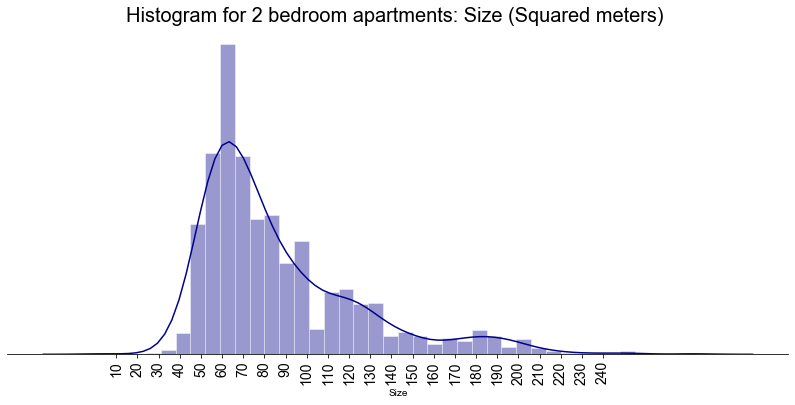

In [5]:
# Distribution plot for 2 bedroom apaprtment sizes by neighborhood (published on Mercado Libre)
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="whitegrid")
sns.distplot(rent_df.loc[:, "Size"],bins=40 , color="darkblue", label="", ax=ax)

ax.set_title('Histogram for 2 bedroom apartments: Size (Squared meters) ', fontsize=20) # título
ax.spines['left'].set_visible(False) # Quitar eje izquierdo
ax.spines['right'].set_visible(False) # Quitar eje derecho
ax.spines['top'].set_visible(False) # Quitar eje superior
ax.axes.get_yaxis().set_visible(False) # Quitar valores eje y
ax.set_xticks(range(10,250, 10)) # Establecer los valores que se desplegan en el eje x
ax.tick_params(labelsize=14, labelrotation=90) # rotar labels y determinar tamaño de letra

plt.show()

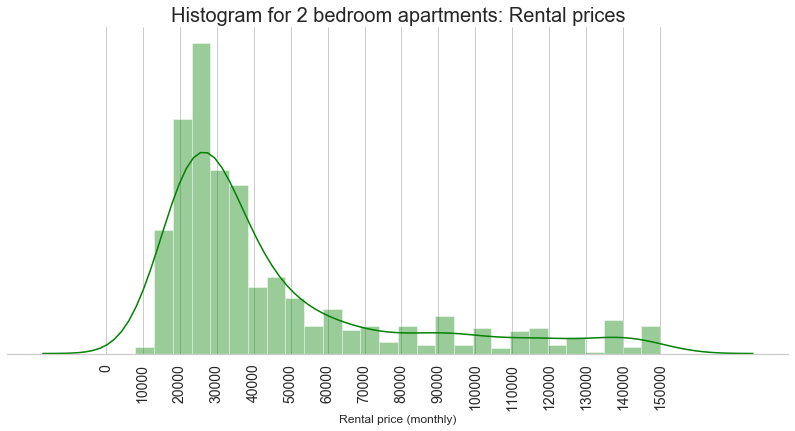

In [6]:
# Distribution plot Squared meter price for 2 bedroom apaprtment rental prices under 150000 Ars$ (published on Mercado Libre)
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="whitegrid")
data = rent_df[rent_df['Rent']<= 150000]
sns.distplot(data.loc[:, "Rent"],kde=True, color="green", label="", ax=ax)
ax.set_title('Histogram for 2 bedroom apartments: Rental prices', fontsize=20)
ax.set_xlabel('Rental price (monthly)')
ax.spines['left'].set_visible(False) # Quitar eje izquierdo
ax.spines['right'].set_visible(False) # Quitar eje derecho
ax.spines['top'].set_visible(False) # Quitar eje superior
ax.axes.get_yaxis().set_visible(False) # Quitar valores eje y
ax.set_xticks(range(0,160000, 10000)) # Establecer los valores que se desplegan en el eje x
ax.tick_params(labelsize=14, labelrotation=90) # rotar labels y determinar tamaño de letra


plt.show()

In [7]:
rent_df.columns
rent_df["Price/Mts2"].max()

8333.3

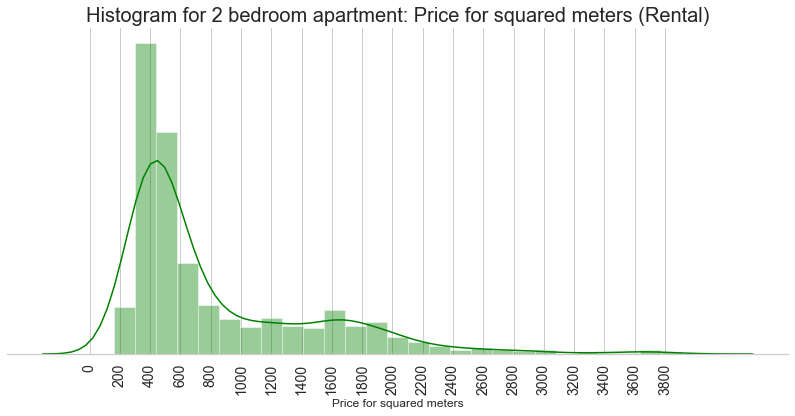

In [8]:
# Distribution plot Squared meter price for 2 bedroom apaprtment rental prices under 150000 Ars$ (published on Mercado Libre)
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="whitegrid")
data = rent_df[rent_df['Price/Mts2']<=4000]
sns.distplot(data.loc[:, "Price/Mts2"],kde=True, color="green", label="", ax=ax)
ax.set_title('Histogram for 2 bedroom apartment: Price for squared meters (Rental)', fontsize=20)
ax.set_xlabel('Price for squared meters')
ax.spines['left'].set_visible(False) # Quitar eje izquierdo
ax.spines['right'].set_visible(False) # Quitar eje derecho
ax.spines['top'].set_visible(False) # Quitar eje superior
ax.axes.get_yaxis().set_visible(False) # Quitar valores eje y
ax.set_xticks(range(0,4000, 200)) # Establecer los valores que se desplegan en el eje x
ax.tick_params(labelsize=14, labelrotation=90) # rotar labels y determinar tamaño de letra


plt.show()

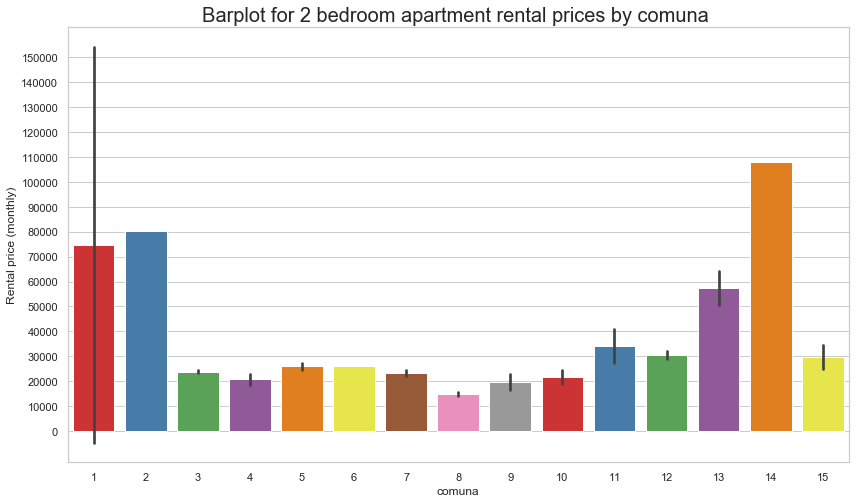

In [9]:
fig_dims = (14, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'comuna', y = 'Rent',ax=ax, ci="sd", palette="Set1", data = final_df)
ax.set_title('Barplot for 2 bedroom apartment rental prices by comuna ', fontsize=20)
ax.set_ylabel('Rental price (monthly)')
ax.set_yticks(range(0,160000, 10000)) # Establecer los valores que se desplegan en el eje y
plt.show()

In [10]:
final_df.columns

Index(['Neighborhood', 'comuna', 'perimetro', 'area', 'Latitude', 'Longitude',
       'poblacion', 'Total_delitos', 'Delitos/Pob', 'Size', 'Rent',
       'Price/Mts2'],
      dtype='object')

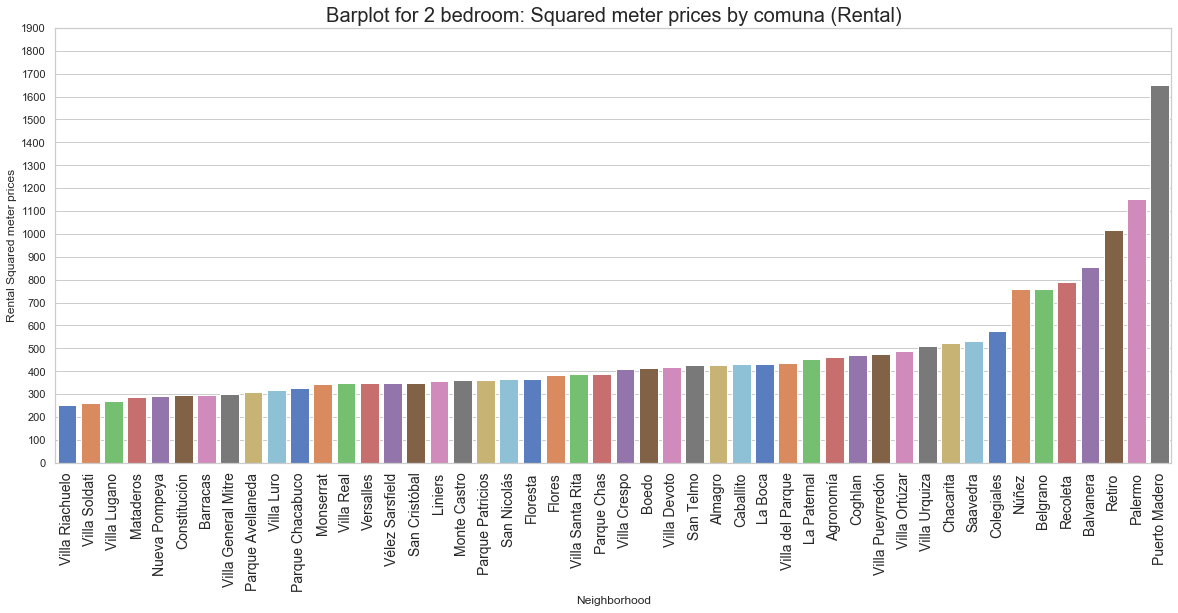

In [11]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
data = final_df.sort_values(by="Price/Mts2", axis=0)
sns.barplot(x = 'Neighborhood', y = 'Price/Mts2',ax=ax, ci="sd", palette="muted", data = data)
ax.set_title('Barplot for 2 bedroom: Squared meter prices by comuna (Rental)', fontsize=20)
ax.set_ylabel('Rental Squared meter prices')
ax.set_yticks(range(0,2000, 100)) # Establecer los valores que se desplegan en el eje y
ax.tick_params('x', labelsize=14, labelrotation=90) # rotar labels y determinar tamaño de letra

plt.show()

Why comuna 1 has such a Standar Deviation? Well, that's because we have the most expensive Neighborhoods (Puerto Madero and Retiro) and some of the less expensive ones in the same gruop. Comunas were defined by gobernment officials...

In addition, as can be seen below, the median size of two-bedroom apartments is much larger in expensive neighborhoods than in cheapear neighborhoods, about double, which also increases the rental price of the apartment.

In [12]:
comuna1 = final_df[final_df["comuna"]==1].sort_values(by="Rent", ascending=False)
comuna1["Rent"].std().round(2)

86878.56

In [13]:
comuna1

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2
40,Puerto Madero,1,17725.72,5040970.89,-34.610376,-58.362207,6726,283,0.04,138.6,232299.4,1649.8
45,Retiro,1,18837.99,4512710.91,-34.591643,-58.373307,65413,3933,0.06,120.0,122591.2,1017.0
19,San Telmo,1,5178.03,1232270.16,-34.621401,-58.373750,20453,1595,0.08,65.9,27666.7,426.8
42,San Nicolás,1,6548.08,2289007.58,-34.604463,-58.384497,29273,6246,0.21,72.5,25480.0,364.6
41,Monserrat,1,6739.22,2198621.94,-34.611559,-58.384127,39914,3227,0.08,67.9,22722.2,342.8
11,Constitución,1,6326.84,2101995.00,-34.624246,-58.383632,44107,3592,0.08,60.7,17499.9,294.3


In [14]:
# This is a function to display values on horizontal bars
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

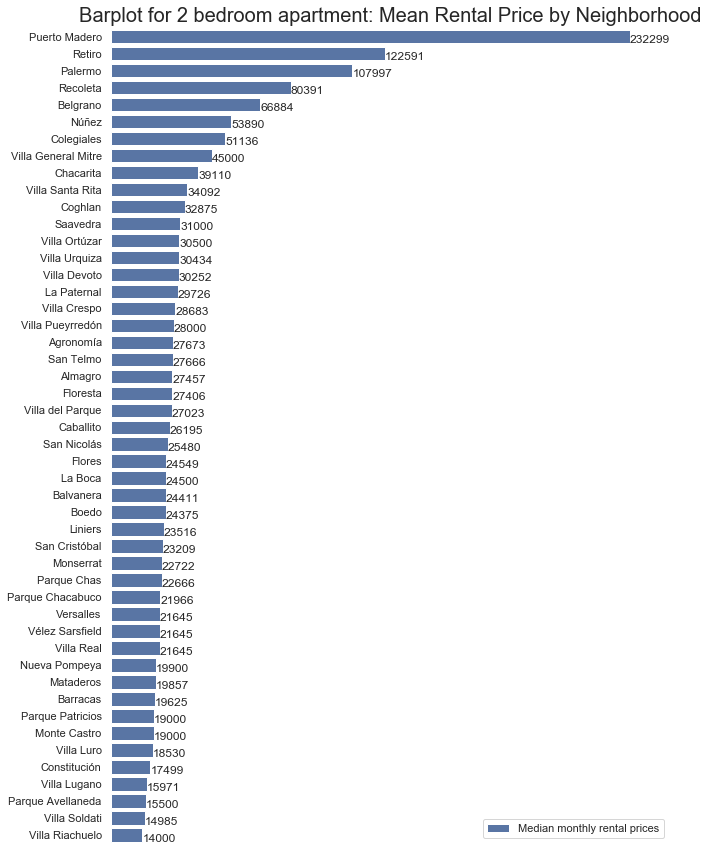

In [15]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Load the example car crash dataset
data = final_df.loc[:, ['Neighborhood','Size', 'Rent']].sort_values(by="Rent", ascending=False)

# Plot the total crashes

sns.barplot(x="Rent", y="Neighborhood", data=data,
            label="Median monthly rental prices", color="b")

ax.set_title('Barplot for 2 bedroom apartment: Mean Rental Price by Neighborhood', fontsize=20)
ax.set_xlabel('mean Rental Price')
ax.spines['left'].set_visible(True) # Quitar eje izquierdo
ax.spines['right'].set_visible(True) # Quitar eje derecho
ax.spines['top'].set_visible(True) # Quitar eje superior
ax.axes.get_xaxis().set_visible(False) # Quitar valores eje y
ax.set_xticks(range(0,250000, 25000)) # Establecer los valores que se desplegan en el eje x
#ax.tick_params(labelsize=14, labelrotation=90) # rotar labels y determinar tamaño de letra

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 250000), ylabel="",
       xlabel="Apartments for rental in Buenos Aires (Mercado Libre)")
sns.despine(left=True, bottom=True)

show_values_on_bars(ax, "h", 0.3)
plt.show()

In [16]:
crime.shape

(48, 2)

In [17]:
crime.columns

Index(['Barrios', 'Cantidad'], dtype='object')

In [28]:
crime.columns

Index(['Barrios', 'Cantidad'], dtype='object')

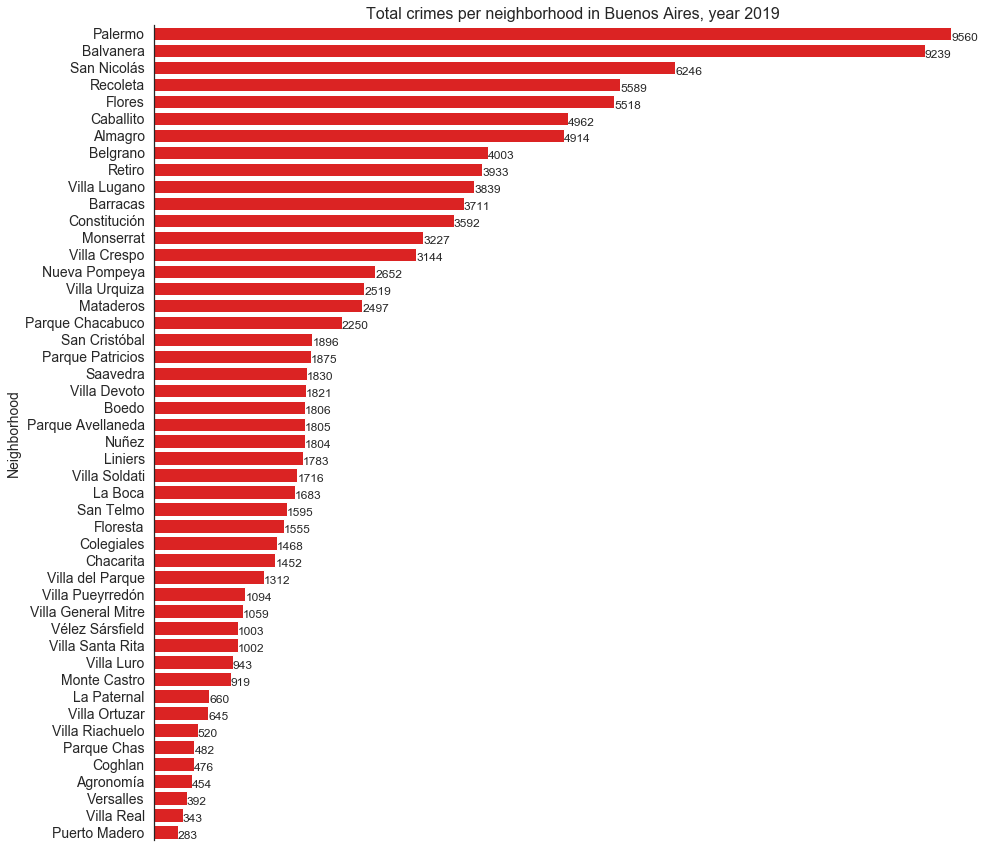

In [31]:
sns.set(style="white")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Load the example car crash dataset
data = crime.loc[:, ['Barrios','Cantidad']].sort_values(by="Cantidad", ascending=False)

# Plot the total crime
sns.set(style="darkgrid")
sns.barplot(x="Cantidad", y="Barrios", data=data,
            label="Median monthly rental prices", color="#F90505")

ax.set_title('Total crimes per neighborhood in Buenos Aires, year 2019', fontsize=16)
ax.set_ylabel('Neighborhood', fontsize=14)
ax.spines['bottom'].set_visible(False) # Quitar linea de eje x
ax.spines['right'].set_visible(False) # Quitar linea eje derecho
ax.spines['top'].set_visible(False) # Quitar linea eje superior
ax.axes.get_xaxis().set_visible(False) # Quitar valores eje x
#ax.set_xticks(range(0,11000, 1000)) # Establecer los valores que se desplegan en el eje x
ax.tick_params(labelsize=14, labelrotation=0) # rotar labels y determinar tamaño de letra

show_values_on_bars(ax, "h", 0.3)
plt.show()

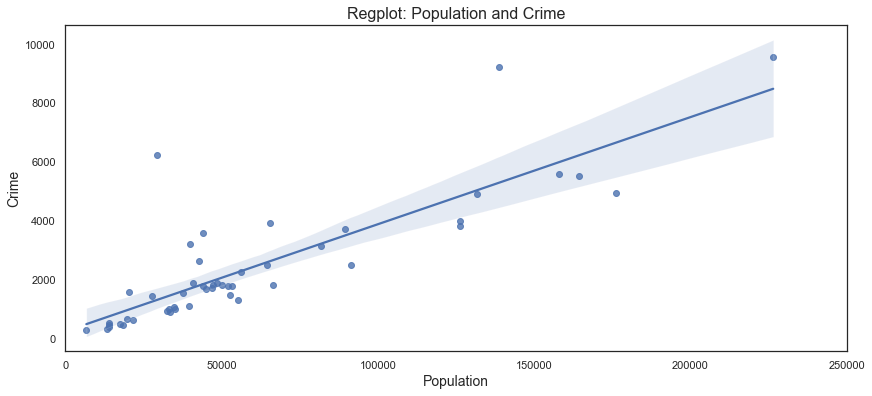

In [20]:
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x='poblacion', y='Total_delitos', data=final_df)
ax.set(xlim=(0, 250000), ylabel="",
       xlabel="")
ax.set_title("Regplot: Population and Crime", fontsize=16)
ax.set_xlabel('Population', fontsize=14)
ax.set_ylabel('Crime', fontsize=14)

plt.show()

The top ten most insecure and the top ten least insecure Neighborhoods, By Crime/Population ratio

In [21]:
df_sorted = final_df.iloc[: ,[0,8]].sort_values(by='Delitos/Pob', ascending=False)
df_sorted.iloc[[0,1,2,3,4,5,6,7,8,9]]

,Neighborhood,Delitos/Pob
42,San Nicolás,0.21
11,Constitución,0.08
41,Monserrat,0.08
19,San Telmo,0.08
24,Balvanera,0.07
45,Retiro,0.06
32,Nueva Pompeya,0.06
16,Parque Patricios,0.05
0,Chacarita,0.05
47,La Boca,0.04


In [22]:
df_sorted.iloc[[-9,-8,-7,-6,-5,-4,-3,-2,-1]]

,Neighborhood,Delitos/Pob
21,Coghlan,0.03
6,Villa Santa Rita,0.03
18,Villa Lugano,0.03
7,Monte Castro,0.03
15,Villa Luro,0.03
14,Vélez Sarsfield,0.03
8,Villa Real,0.03
28,Villa Ortúzar,0.03
3,Villa del Parque,0.02


The top ten most insecure and the top ten least insecure Neighborhoods, By Total Crime 

In [23]:
df_sorted2 = final_df.iloc[: ,[0,7]].sort_values(by='Total_delitos', ascending=False)
df_sorted2.iloc[[0,1,2,3,4,5,6,7,8,9]]

,Neighborhood,Total_delitos
33,Palermo,9560
24,Balvanera,9239
42,San Nicolás,6246
44,Recoleta,5589
9,Flores,5518
5,Caballito,4962
4,Almagro,4914
43,Belgrano,4003
45,Retiro,3933
18,Villa Lugano,3839


In [24]:
df_sorted2.iloc[[-9,-8,-7,-6,-5,-4,-3,-2,-1]]

,Neighborhood,Total_delitos
1,La Paternal,660
28,Villa Ortúzar,645
34,Villa Riachuelo,520
26,Parque Chas,482
21,Coghlan,476
27,Agronomía,454
39,Versalles,392
8,Villa Real,343
40,Puerto Madero,283


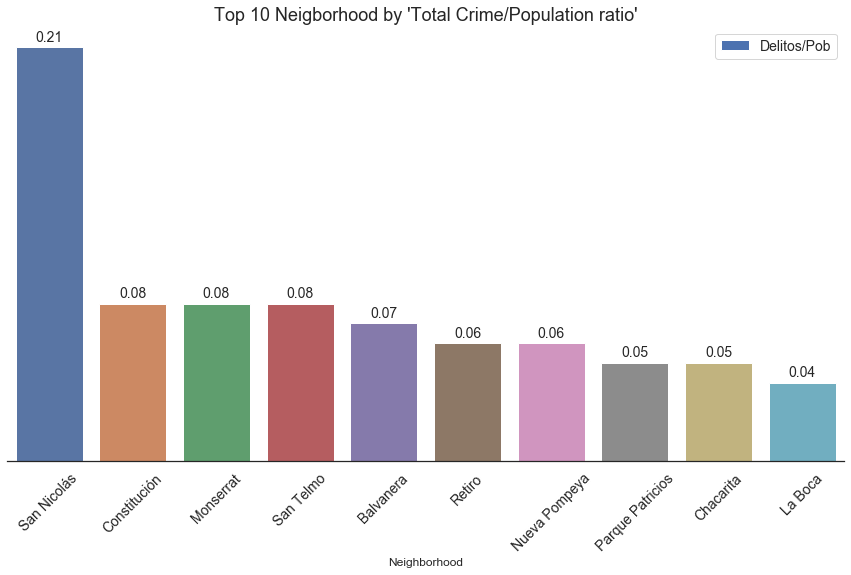

In [35]:
# Define fig
ax1 = df_sorted.iloc[0:10,[0,1]].plot(kind='bar', 
               figsize=(15, 8),
               width=0.8,
               fontsize = 14)

sns.set(style="white")

ax1.set_title("Top 10 Neigborhood by 'Total Crime/Population ratio'", fontsize = 18)
ax1.legend(fontsize = 14)
ax1.tick_params(labelsize=14, labelrotation=45)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

# Add the percentage values:    
for i in ax1.patches:
    ax1.annotate(np.round(i.get_height(),decimals=2), 
                (i.get_x()+i.get_width()/2., i.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

sns.barplot(x= df_sorted.iloc[0:10,0], y= df_sorted.iloc[0:10,1]) 
plt.show()

# Methodology - Getting venues, mapping and clustering

##### Define Foursquare Credentials and Version

In [26]:
CLIENT_ID = 'QKCYGSSLP442NZDZ2DLFXUQDKESCSM0BAHFJPUPEQEIJAYQT' # your Foursquare ID
CLIENT_SECRET = 'AYH3ANHHDYOUE4LJAP43HZPNL5D33KWDMXVQAT4LDM0J3IRE' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QKCYGSSLP442NZDZ2DLFXUQDKESCSM0BAHFJPUPEQEIJAYQT
CLIENT_SECRET:AYH3ANHHDYOUE4LJAP43HZPNL5D33KWDMXVQAT4LDM0J3IRE


##### Set Nominatim

In [39]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
Nom = Nominatim(user_agent='user_agent') #define user agent
from geopy.extra.rate_limiter import RateLimiter # Be a good user and respect the user agreement from open streets
geocode = RateLimiter(Nom.geocode, min_delay_seconds=1.5)

### Mapping my current home

In [37]:
#Get the latitude and Longitude for my actual apartment
country = 'Argentina'
city = "Ciudad de Buenos Aires"
barrio = 'Boedo'
address = 'Avenida Independencia 3600'
loc= Nom.geocode(city+','+ barrio+','+address)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)
print(loc.address)
#lista=[]
#for i in barrios['barrio']:
 #   loc=Nom.geocode(city+','+ barrio)
  #  list.append(loc)
#list
Boedo_Lat, Boedo_Long = loc.latitude, loc.longitude
print("\n")

print('The geographical coordinate of my current home at Buenos Aires are {}, {}.'.format(Boedo_Lat, Boedo_Long))

latitude is :- -34.621109 
longtitude is:- -58.4163306
MP3, Avenida Independencia, Boedo, Buenos Aires, Comuna 5, Ciudad Autónoma de Buenos Aires, C1126AAN, Argentina


The geographical coordinate of my current home at Buenos Aires are -34.621109, -58.4163306.


In [226]:
#Get the latitude and Longitude for Buenos Aires
BA_loc = Nom.geocode("Ciudad Autónoma de Buenos Aires")
BA_lat, BA_long = BA_loc.latitude, BA_loc.longitude
print('The geographical coordinate of Buenos Aires are {}, {}.'.format(BA_lat, BA_long))

The geographical coordinate of Buenos Aires are -34.6075682, -58.4370894.


In [40]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Boedo_Lat, 
    Boedo_Long, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=QKCYGSSLP442NZDZ2DLFXUQDKESCSM0BAHFJPUPEQEIJAYQT&client_secret=AYH3ANHHDYOUE4LJAP43HZPNL5D33KWDMXVQAT4LDM0J3IRE&v=20180604&ll=-34.621109,-58.4163306&radius=500&limit=100'

In [41]:
# results display is hidden for report simplification 
results = requests.get(url).json()
#results

In [42]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [43]:
venues = results['response']['groups'][0]['items']
my_venues = pd.json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
my_venues =my_venues.loc[:, filtered_columns]
# filter the category for each row
my_venues['venue.categories'] = my_venues.apply(get_category_type, axis=1)
# clean columns
my_venues.columns = [col.split(".")[-1] for col in my_venues.columns]

my_venues.shape

(25, 4)

In [44]:
my_venues.head(10)

,name,categories,lat,lng
0,Café Martínez,Café,-34.622760,-58.416399
1,Timbre 4,Indie Theater,-34.619923,-58.415910
2,Pizzería Jaimito,Pizza Place,-34.619751,-58.413987
3,Spiagge di Napoli,Italian Restaurant,-34.620915,-58.415537
4,Don Boedo,Pizza Place,-34.623151,-58.416302
5,Pan y Arte,Argentinian Restaurant,-34.623478,-58.416165
6,Pizzería Hot,Pizza Place,-34.617864,-58.416699
7,Esquina Homero Manzi,Argentinian Restaurant,-34.625429,-58.416222
8,Café Margot,Coffee Shop,-34.623327,-58.416372
9,El Desembarco,Beer Bar,-34.621009,-58.419494


In [45]:
my_venues.groupby(by="categories").count().sort_values(by="name", ascending=False).drop(labels=["lat","lng"], axis=1)

,name
categories,
Pizza Place,5
Argentinian Restaurant,4
Café,2
Coffee Shop,2
BBQ Joint,1
Beer Bar,1
Burger Joint,1
Dessert Shop,1
Health Food Store,1


###### Mapping my current home surroundings

In [46]:
latitude=Boedo_Lat
longitude=Boedo_Long
# create map of Singapore place  using latitude and longitude values
Boedo_map = folium.Map(location=[latitude, longitude], zoom_start=17)
# add markers to map
for lat, lng, label in zip(my_venues['lat'], my_venues['lng'], my_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(Boedo_map)  
    
Boedo_map

##  Explore Neighborhoods in Buenos Aires

#### Function to get venues of each neighborhood.

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *BA_Venues*.

In [50]:
BA_venues = getNearbyVenues(names=final_df['Neighborhood'],
                                   latitudes=final_df['Latitude'],
                                   longitudes=final_df['Longitude']
                                  )

Chacarita
La Paternal
Villa Crespo
Villa del Parque
Almagro
Caballito
Villa Santa Rita
Monte Castro
Villa Real
Flores
Floresta
Constitución
San Cristóbal
Boedo
Vélez Sarsfield
Villa Luro
Parque Patricios
Mataderos
Villa Lugano
San Telmo
Saavedra
Coghlan
Villa Urquiza
Colegiales
Balvanera
Villa General Mitre
Parque Chas
Agronomía
Villa Ortúzar
Barracas
Parque Avellaneda
Parque Chacabuco
Nueva Pompeya
Palermo
Villa Riachuelo
Villa Soldati
Villa Pueyrredón
Villa Devoto
Liniers
Versalles
Puerto Madero
Monserrat
San Nicolás
Belgrano
Recoleta
Retiro
Núñez
La Boca


In [3]:
#BA_venues=pd.read_csv('./Data/BA_venues.csv')
print(BA_venues.shape)
#BA_venues.to_csv('./Data/BA_venues.csv', index=False)
#Save the DF so we don't have to call the API agian

(1129, 7)


In [52]:
BA_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chacarita,-34.588011,-58.454156,El Imperio de la Pizza,-34.586890,-58.454967,Pizza Place
1,Chacarita,-34.588011,-58.454156,Fábrica de Churros Olleros,-34.586983,-58.453640,Bakery
2,Chacarita,-34.588011,-58.454156,Sede Central de Whisky,-34.586750,-58.450596,Whisky Bar
3,Chacarita,-34.588011,-58.454156,Pizzería Santa María,-34.587238,-58.454005,Pizza Place
4,Chacarita,-34.588011,-58.454156,Donnet,-34.588333,-58.450745,Vegetarian / Vegan Restaurant



Let's check how many venues were returned for each neighborhood


In [53]:
#BA_venues.groupby('Neighborhood').count()
pd.crosstab(index=BA_venues['Neighborhood'], columns=BA_venues['Venue'].count(),
            rownames = ['Barrios'], colnames = ['Venues'])

Venues,1129
Barrios,
Agronomía,8
Almagro,32
Balvanera,14
Barracas,3
Belgrano,42
Boedo,16
Caballito,41
Chacarita,24
Coghlan,18


#### Let's find out how many unique categories can be curated from all the returned venues

In [54]:
print('There are {} uniques categories.'.format(len(BA_venues['Venue Category'].unique())))

There are 177 uniques categories.


## 3. Analyze Each Neighborhood

In [4]:
# one hot encoding
BA_onehot = pd.get_dummies(BA_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BA_onehot['Neighborhood'] = BA_venues['Neighborhood'] 

# move neighborhood column to the first column
first_col = BA_onehot.pop('Neighborhood')
BA_onehot.insert(0, 'Neighborhood', first_col)

BA_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Doctor's Office,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Factory,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food & Drink Shop,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Latin American Restaurant,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Radio Station,Record Shop,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,School,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Soccer Field,Soccer Stadium,South American Restaurant,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Street Fair,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Toll Booth,Toy / Game Store,Trail,Train Station,Tunnel,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Chacarita,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chacarita,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chacarita,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Chacarita,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chacarita,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

And let's examine the new dataframe size.

In [165]:
BA_onehot.shape

(1129, 178)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [5]:
BA_grouped = BA_onehot.groupby('Neighborhood').mean().reset_index()
BA_grouped.round(3)

,Neighborhood,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Doctor's Office,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Factory,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food & Drink Shop,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Latin American Restaurant,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Radio Station,Record Shop,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,School,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Soccer Field,Soccer Stadium,South American Restaurant,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Street Fair,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Toll Booth,Toy / Game Store,Trail,Train Station,Tunnel,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Agronomía,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.125,0.000,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.125,0.000,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000
1,Almagro,0.000,0.000,0.000,0.156,0.000,0.000,0.000,0.00,0.000,0.000,0.031,0.000,0.031,0.125,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.031,0.031,0.000,0.031,0.000,0.000,0.000,0.000,0.000,0.031,0.000,0.000,0.000,0.031,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.031,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.031,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.

In [59]:
BA_grouped.shape

(48, 178)

#### Let's print each neighborhood along with the top 5 most common venues

In [60]:
num_top_venues = 5

for hood in BA_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = BA_grouped[BA_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agronomía----
                venue  freq
0              Tunnel  0.12
1            Bus Stop  0.12
2               Plaza  0.12
3  Athletics & Sports  0.12
4           BBQ Joint  0.12


----Almagro----
                    venue  freq
0  Argentinian Restaurant  0.16
1                     Bar  0.12
2          Ice Cream Shop  0.09
3             Pizza Place  0.06
4      Italian Restaurant  0.06


----Balvanera----
                  venue  freq
0  Fast Food Restaurant  0.21
1                  Café  0.14
2           Pizza Place  0.07
3  Gym / Fitness Center  0.07
4           Gas Station  0.07


----Barracas----
                 venue  freq
0       Farmers Market  0.33
1        Auto Workshop  0.33
2        Train Station  0.33
3    Accessories Store  0.00
4  Peruvian Restaurant  0.00


----Belgrano----
                    venue  freq
0             Coffee Shop  0.07
1  Argentinian Restaurant  0.07
2             Pizza Place  0.05
3               Bookstore  0.05
4                    Café  0.05


4                 Gym  0.08


----Villa Riachuelo----
                   venue  freq
0            Beer Garden  0.33
1                  Plaza  0.33
2            Pizza Place  0.33
3      Accessories Store  0.00
4  Performing Arts Venue  0.00


----Villa Santa Rita----
            venue  freq
0  Ice Cream Shop  0.09
1       BBQ Joint  0.09
2        Bus Stop  0.09
3            Café  0.09
4            Park  0.09


----Villa Soldati----
               venue  freq
0           Bus Stop   0.5
1     Soccer Stadium   0.5
2  Accessories Store   0.0
3       Noodle House   0.0
4        Opera House   0.0


----Villa Urquiza----
                venue  freq
0  Italian Restaurant  0.12
1         Pizza Place  0.08
2         Coffee Shop  0.08
3                Café  0.08
4              Bakery  0.08


----Villa del Parque----
            venue  freq
0        Pharmacy  0.14
1  Ice Cream Shop  0.09
2             Gym  0.09
3           Plaza  0.09
4   Train Station  0.05


----Vélez Sarsfield----
              

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [6]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [7]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = BA_grouped['Neighborhood']

for ind in np.arange(BA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BA_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agronomía,BBQ Joint,Plaza,Garden Center,Farmers Market,Bus Stop,Athletics & Sports,Tunnel,Trail,Empanada Restaurant,Flea Market
1,Almagro,Argentinian Restaurant,Bar,Ice Cream Shop,Pizza Place,Italian Restaurant,Cheese Shop,Sandwich Place,Coffee Shop,Concert Hall,Dessert Shop
2,Balvanera,Fast Food Restaurant,Café,Hotel,Furniture / Home Store,Arts & Crafts Store,Pizza Place,Gas Station,Gym / Fitness Center,BBQ Joint,Gym
3,Barracas,Train Station,Farmers Market,Auto Workshop,Electronics Store,Food & Drink Shop,Flea Market,Fish Market,Fast Food Restaurant,Factory,Event Space
4,Belgrano,Argentinian Restaurant,Coffee Shop,Ice Cream Shop,Tea Room,Pizza Place,Vegetarian / Vegan Restaurant,Bookstore,Café,Pharmacy,Peruvian Restaurant


In [77]:
#neighborhoods_venues_sorted.to_csv(r"./Data/neighborhoods_venues_sorted.csv", index=False)

In [9]:
# Load data frames from part 1
final_df = pd.read_csv(r"./Data/final_df.csv")
rent_df = pd.read_csv(r"./Data/rent_df.csv")
crime = pd.read_csv(r"./Data/delitosxbarrio.csv")

In [10]:
final_df.head()

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2,subway stations
0,Chacarita,15,7724.85,3115707.11,-34.588011,-58.454156,27761,1452,0.05,70.0,39110.70,524.90,2.0
1,La Paternal,15,7087.51,2229829.03,-34.597740,-58.470199,19717,660,0.03,64.1,29726.86,454.72,0.0
2,Villa Crespo,15,8131.86,3615977.56,-34.598395,-58.442474,81959,3144,0.04,70.2,28683.90,410.00,1.0
3,Villa del Parque,11,7705.39,3399595.64,-34.604797,-58.493821,55273,1312,0.02,63.4,27023.80,437.50,0.0
4,Almagro,5,8537.90,4050752.25,-34.609988,-58.422233,131699,4914,0.04,64.1,27457.00,427.10,5.0


In [11]:
fdf_c = final_df.drop(columns=["perimetro", "Latitude", "Longitude"])
fdf_c.head()

,Neighborhood,comuna,area,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2,subway stations
0,Chacarita,15,3115707.11,27761,1452,0.05,70.0,39110.70,524.90,2.0
1,La Paternal,15,2229829.03,19717,660,0.03,64.1,29726.86,454.72,0.0
2,Villa Crespo,15,3615977.56,81959,3144,0.04,70.2,28683.90,410.00,1.0
3,Villa del Parque,11,3399595.64,55273,1312,0.02,63.4,27023.80,437.50,0.0
4,Almagro,5,4050752.25,131699,4914,0.04,64.1,27457.00,427.10,5.0


In [12]:
from sklearn.preprocessing import StandardScaler

X = fdf_c.values[:,2:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-4.09648170e-01, -6.69694173e-01, -4.71622425e-01,
         2.52441223e-01,  1.68381191e-03,  8.31789491e-02,
         1.96132552e-01,  2.14590054e-01],
       [-7.31653306e-01, -8.35701580e-01, -8.50075155e-01,
        -4.60333995e-01, -2.96350896e-01, -1.79143873e-01,
        -7.93335598e-02, -5.48396805e-01],
       [-2.27806383e-01,  4.48812725e-01,  3.36890226e-01,
        -1.03946386e-01,  1.17866833e-02, -2.08299550e-01,
        -2.54865684e-01, -1.66903376e-01],
       [-3.06458390e-01, -1.01917469e-01, -5.38520634e-01,
        -8.16721604e-01, -3.31710946e-01, -2.54707217e-01,
        -1.46924418e-01, -5.48396805e-01],
       [-6.97714499e-02,  1.47531800e+00,  1.18267474e+00,
        -1.03946386e-01, -2.96350896e-01, -2.42597223e-01,
        -1.87745843e-01,  1.35907034e+00],
       [ 9.48092616e-01,  2.39114480e+00,  1.20561127e+00,
        -4.60333995e-01, -4.52945403e-01, -2.77862129e-01,
        -1.70867754e-01,  1.35907034e+00],
       [-7.59328556e-01, -5.548675

In [13]:
cluster_cols = pd.DataFrame(cluster_dataset, columns=["Area", "Population", "TotalCrime", "Crime/Pob", "Size", "Rent", "Prices_Mts2", "s_stations"])
cluster_cols.head()

,Area,Population,TotalCrime,Crime/Pob,Size,Rent,Prices_Mts2,s_stations
0,-0.409648,-0.669694,-0.471622,0.252441,0.001684,0.083179,0.196133,0.214590
1,-0.731653,-0.835702,-0.850075,-0.460334,-0.296351,-0.179144,-0.079334,-0.548397
2,-0.227806,0.448813,0.336890,-0.103946,0.011787,-0.208300,-0.254866,-0.166903
3,-0.306458,-0.101917,-0.538521,-0.816722,-0.331711,-0.254707,-0.146924,-0.548397
4,-0.069771,1.475318,1.182675,-0.103946,-0.296351,-0.242597,-0.187746,1.359070


In [14]:
final_df.columns

Index(['Neighborhood', 'comuna', 'perimetro', 'area', 'Latitude', 'Longitude',
       'poblacion', 'Total_delitos', 'Delitos/Pob', 'Size', 'Rent',
       'Price/Mts2', 'subway stations'],
      dtype='object')

In [15]:
# We copy our DF and replace the columns
cluster_df = final_df.copy()
cluster_df["area"] = cluster_cols['Area']
cluster_df['poblacion'] = cluster_cols['Population']
cluster_df['Total_delitos'] = cluster_cols['TotalCrime']
cluster_df['Delitos/Pob'] = cluster_cols['Crime/Pob']
cluster_df['Size'] = cluster_cols['Size']
cluster_df['Rent'] = cluster_cols['Rent']
cluster_df['Price/Mts2'] = cluster_cols['Prices_Mts2']
cluster_df['subway stations'] = cluster_cols['s_stations']
cluster_df.head()

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2,subway stations
0,Chacarita,15,7724.85,-0.409648,-34.588011,-58.454156,-0.669694,-0.471622,0.252441,0.001684,0.083179,0.196133,0.214590
1,La Paternal,15,7087.51,-0.731653,-34.597740,-58.470199,-0.835702,-0.850075,-0.460334,-0.296351,-0.179144,-0.079334,-0.548397
2,Villa Crespo,15,8131.86,-0.227806,-34.598395,-58.442474,0.448813,0.336890,-0.103946,0.011787,-0.208300,-0.254866,-0.166903
3,Villa del Parque,11,7705.39,-0.306458,-34.604797,-58.493821,-0.101917,-0.538521,-0.816722,-0.331711,-0.254707,-0.146924,-0.548397
4,Almagro,5,8537.90,-0.069771,-34.609988,-58.422233,1.475318,1.182675,-0.103946,-0.296351,-0.242597,-0.187746,1.359070


In [175]:
cluster_df.to_csv(r'./Data/cluster_df.csv', index=False)

### Modeling

In [16]:
# Get all data in one data frame for clustering
BA_data = pd.merge(cluster_df, BA_grouped, how='left', on='Neighborhood')
BA_data.head()

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2,subway stations,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Bookstore,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Bus Stop,Café,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Doctor's Office,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Factory,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Food & Drink Shop,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Latin American Restaurant,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Radio Station,Record Shop,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,School,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Soccer Field,Soccer Stadium,South American Restaurant,Spanish Restaurant,Sporting Goods Shop,Sports Club,Steakhouse,Street Fair,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Toll Booth,Toy / Game Store,Trail,Train Station,Tunnel,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Chacarita,15,7724.85,-0.409648,-34.588011,-58.454156,-0.669694,-0.471622,0.252441,0.001684,0.083179,0.196133,0.214590,0.0,0.0,0.000000,0.083333,0.0,0.0,0.0,0.00,0.000000,0.0,0.00000,0.0,0.041667,0.041667,0.0,0.0,0.000000,0.041667,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.041667,0.041667,0.083333,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.041667,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.041667,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.125000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.041667,0.041667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.000000,0.0,0.0,0.041667,0.041667,0.0,0.0,0.041667,0.0,0.0,0.0,0.0
1,La Paternal,15,7087.51,-0.731653,-34.597740,-58.470199,-0.835702,-0.850075,-0.460334,-0.296351,-0.179144,-0.079334,-0.548397,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.25,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.

In [177]:
# Save the Data frame
BA_data.to_csv('./Data/BA_data.csv', index = False)


## 4. Cluster Neighborhoods

In [208]:
# set number of clusters
kclusters = 5

BA_grouped_clustering = BA_data.drop(columns=['Neighborhood', 'comuna','perimetro', 'Latitude', 'Longitude'], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:] 

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 0, 4, 0,
       0, 2, 1, 1])

In [209]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 0, 4, 0,
       0, 2, 1, 1])

In [215]:
#neighborhoods_venues_sorted.drop(columns='Cluster Labels', inplace=True)

In [216]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

BA_merged = cluster_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
BA_merged = BA_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

BA_merged.head() # check the last columns!

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2,subway stations,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chacarita,15,7724.85,-0.409648,-34.588011,-58.454156,-0.669694,-0.471622,0.252441,0.001684,0.083179,0.196133,0.214590,1,Pizza Place,Argentinian Restaurant,Café,Coffee Shop,Theater,Bus Station,Bus Stop,Sandwich Place,Spanish Restaurant,Sporting Goods Shop
1,La Paternal,15,7087.51,-0.731653,-34.597740,-58.470199,-0.835702,-0.850075,-0.460334,-0.296351,-0.179144,-0.079334,-0.548397,1,Bus Stop,Diner,Arts & Entertainment,Shopping Mall,Yoga Studio,English Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
2,Villa Crespo,15,8131.86,-0.227806,-34.598395,-58.442474,0.448813,0.336890,-0.103946,0.011787,-0.208300,-0.254866,-0.166903,1,Pizza Place,Café,Argentinian Restaurant,Coffee Shop,Ice Cream Shop,Dance Studio,Sandwich Place,Bakery,Burger Joint,Gym
3,Villa del Parque,11,7705.39,-0.306458,-34.604797,-58.493821,-0.101917,-0.538521,-0.816722,-0.331711,-0.254707,-0.146924,-0.548397,1,Pharmacy,Ice Cream Shop,Plaza,Gym,Train Station,Shopping Mall,Big Box Store,Mediterranean Restaurant,Gastropub,Bakery
4,Almagro,5,8537.90,-0.069771,-34.609988,-58.422233,1.475318,1.182675,-0.103946,-0.296351,-0.242597,-0.187746,1.359070,1,Argentinian Restaurant,Bar,Ice Cream Shop,Pizza Place,Italian Restaurant,Cheese Shop,Sandwich Place,Coffee Shop,Concert Hall,Dessert Shop


In [325]:
BA_merged.to_csv('./Data/BA_merged.csv', index = False)

Finally, let's visualize the resulting clusters

In [217]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BA_merged['Latitude'], BA_merged['Longitude'], BA_merged['Neighborhood'], BA_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters
Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

In [316]:
BA_merged.loc[BA_merged['Cluster Labels'] == 0, BA_merged.columns[[0] + list(range(8, BA_merged.shape[1]))]]

,Neighborhood,Delitos/Pob,Size,Rent,Price/Mts2,subway stations,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Villa Santa Rita,-0.460334,1.279697,-0.057112,-0.346714,-0.548397,0,Ice Cream Shop,BBQ Joint,Pizza Place,Park,Shop & Service,Café,Bus Stop,Bar,Sports Club,Gym
7,Monte Castro,-0.460334,-0.892420,-0.479010,-0.451908,-0.548397,0,Café,Ice Cream Shop,Argentinian Restaurant,Coffee Shop,Pizza Place,School,Empanada Restaurant,Fish Market,Fast Food Restaurant,Farmers Market
8,Villa Real,-0.460334,-0.437791,-0.405059,-0.497832,-0.548397,0,Bus Stop,Tennis Court,Sports Club,Pharmacy,Bus Station,Gym,Athletics & Sports,Bakery,Plaza,History Museum
13,Boedo,-0.103946,-0.599437,-0.328754,-0.231315,-0.166903,0,Argentinian Restaurant,Soccer Field,Breakfast Spot,Ice Cream Shop,Intersection,Dessert Shop,Pizza Place,BBQ Joint,Event Space,Food & Drink Shop
23,Colegiales,-0.460334,0.324976,0.419360,0.403772,-0.548397,0,Pizza Place,Argentinian Restaurant,Gym,Brewery,Beer Bar,Café,Mexican Restaurant,Bus Station,Sports Club,South American Restaurant
26,Parque Chas,-0.460334,-0.589334,-0.376509,-0.341611,-0.548397,0,Plaza,BBQ Joint,Pizza Place,Café,Grocery Store,Electronics Store,Fish Market,Fast Food Restaurant,Farmers Market,Factory
35,Villa Soldati,-0.103946,-0.655003,-0.591229,-0.835786,-0.548397,0,Soccer Stadium,Bus Stop,Yoga Studio,Food Service,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Factory,Event Space
43,Belgrano,-0.460334,0.547239,0.859583,1.113830,0.596083,0,Argentinian Restaurant,Coffee Shop,Ice Cream Shop,Tea Room,Pizza Place,Vegetarian / Vegan Restaurant,Bookstore,Café,Pharmacy,Peruvian Restaurant


In [317]:
BA_merged.loc[BA_merged['Cluster Labels'] == 1, BA_merged.columns[[0] + list(range(8, BA_merged.shape[1]))]]

,Neighborhood,Delitos/Pob,Size,Rent,Price/Mts2,subway stations,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chacarita,0.252441,0.001684,0.083179,0.196133,0.214590,1,Pizza Place,Argentinian Restaurant,Café,Coffee Shop,Theater,Bus Station,Bus Stop,Sandwich Place,Spanish Restaurant,Sporting Goods Shop
1,La Paternal,-0.460334,-0.296351,-0.179144,-0.079334,-0.548397,1,Bus Stop,Diner,Arts & Entertainment,Shopping Mall,Yoga Studio,English Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
2,Villa Crespo,-0.103946,0.011787,-0.208300,-0.254866,-0.166903,1,Pizza Place,Café,Argentinian Restaurant,Coffee Shop,Ice Cream Shop,Dance Studio,Sandwich Place,Bakery,Burger Joint,Gym
3,Villa del Parque,-0.816722,-0.331711,-0.254707,-0.146924,-0.548397,1,Pharmacy,Ice Cream Shop,Plaza,Gym,Train Station,Shopping Mall,Big Box Store,Mediterranean Restaurant,Gastropub,Bakery
4,Almagro,-0.103946,-0.296351,-0.242597,-0.187746,1.359070,1,Argentinian Restaurant,Bar,Ice Cream Shop,Pizza Place,Italian Restaurant,Cheese Shop,Sandwich Place,Coffee Shop,Concert Hall,Dessert Shop
5,Caballito,-0.460334,-0.452945,-0.277862,-0.170868,1.359070,1,Café,Argentinian Restaurant,Bakery,Fast Food Restaurant,Gym,Soccer Stadium,Market,Restaurant,Pizza Place,Plaza
9,Flores,-0.460334,-0.266042,-0.323864,-0.363984,1.359070,1,Ice Cream Shop,Café,Pizza Place,Pharmacy,Electronics Store,Tennis Court,Restaurant,Dessert Shop,Noodle House,Shopping Plaza
10,Floresta,-0.103946,0.178484,-0.244017,-0.428357,-0.548397,1,Argentinian Restaurant,Plaza,Comfort Food Restaurant,Deli / Bodega,Supermarket,Middle Eastern Restaurant,Toy / Game Store,Café,Yoga Studio,English Restaurant
11,Constitución,1.321604,-0.468100,-0.520945,-0.709004,-0.548397,1,Café,Argentinian Restaurant,Intersection,Bus Stop,Soccer Field,Hotel,BBQ Joint,Plaza,Electronics Store,Fast Food Restaurant
12,San Cristóbal,-0.103946,-0.084191,-0.361346,-0.490766,0.214590,1,Ice Cream Shop,Theater,Pizza Place,Convenience Store,Pharmacy,Dessert Shop,Café,Bus Stop,Soccer Field,Breakfast Spot


In [318]:
BA_merged.loc[BA_merged['Cluster Labels'] == 2, BA_merged.columns[[0] + list(range(8, BA_merged.shape[1]))]]

,Neighborhood,Delitos/Pob,Size,Rent,Price/Mts2,subway stations,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Villa Urquiza,-0.460334,-0.498408,-0.159376,0.132153,0.214590,2,Italian Restaurant,Coffee Shop,Café,Bakery,Pizza Place,Train Station,Metro Station,Sports Club,Restaurant,Ice Cream Shop
36,Villa Pueyrredón,-0.460334,-0.543871,-0.227418,-0.003264,-0.548397,2,Plaza,Ice Cream Shop,Coffee Shop,Train Station,Dance Studio,Empanada Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market


In [319]:
BA_merged.loc[BA_merged['Cluster Labels'] == 3, BA_merged.columns[[0] + list(range(8, BA_merged.shape[1]))]]

,Neighborhood,Delitos/Pob,Size,Rent,Price/Mts2,subway stations,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,Versalles,-0.460334,-0.437791,-0.405059,-0.497832,-0.548397,3,Soccer Field,Supermarket,Plaza,Market,Argentinian Restaurant,Pizza Place,Veterinarian,Hardware Store,Gym / Fitness Center,Grocery Store


In [320]:
BA_merged.loc[BA_merged['Cluster Labels'] == 4, BA_merged.columns[[0] + list(range(8, BA_merged.shape[1]))]]

,Neighborhood,Delitos/Pob,Size,Rent,Price/Mts2,subway stations,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Villa Riachuelo,-0.103946,-0.756032,-0.618784,-0.865224,-0.548397,4,Beer Garden,Plaza,Pizza Place,Yoga Studio,Empanada Restaurant,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Factory


In [223]:
final_df['labels'] = labels
final_df.head()

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2,subway stations,labels
0,Chacarita,15,7724.85,3115707.11,-34.588011,-58.454156,27761,1452,0.05,70.0,39110.70,524.90,2.0,1
1,La Paternal,15,7087.51,2229829.03,-34.597740,-58.470199,19717,660,0.03,64.1,29726.86,454.72,0.0,1
2,Villa Crespo,15,8131.86,3615977.56,-34.598395,-58.442474,81959,3144,0.04,70.2,28683.90,410.00,1.0,1
3,Villa del Parque,11,7705.39,3399595.64,-34.604797,-58.493821,55273,1312,0.02,63.4,27023.80,437.50,0.0,1
4,Almagro,5,8537.90,4050752.25,-34.609988,-58.422233,131699,4914,0.04,64.1,27457.00,427.10,5.0,0


In [224]:
final_df.drop(columns=['comuna', 'Latitude', 'Longitude']).groupby('labels').mean().round(2)

,perimetro,area,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2,subway stations
labels,,,,,,,,,
0,13442.05,6205764.28,132687.25,5161.38,0.04,68.96,36072.83,531.76,5.50
1,8351.26,3508751.38,41686.31,1548.83,0.04,66.32,26598.32,398.84,0.39
2,18281.86,4776840.90,36069.50,2108.00,0.05,129.30,177445.30,1333.40,2.50
3,22126.53,15845871.29,226534.00,9560.00,0.04,88.10,107997.60,1152.90,6.00
4,6548.08,2289007.58,29273.00,6246.00,0.21,72.50,25480.00,364.60,0.00


# Clustering conclusion

Observing the characteristics of the clusters and their components, and being a native of Buenos Aires, I can draw some conclusions:
* The the large differences in public green spaces (plazas, parks, natural reserves, etc) between the neighborhoods of Buenos Aires were not reflected by the Foursquare API. This is probably due to its low use by the local public.
* More properties could be added to extend the characteristics of the neighborhoods and thus achieve a better classification. This would require intense data search and cleaning work, as well as web scraping, since the open data from Buenos Aires is scarce and of little granularity.
* Despite the above, clusters provide important information, such as high or low crime, and allow establishing a first approach to finding an apartment according to the conditions detailed above (Cluster 0  looks promising).

# Searching for an apartment on cluster 0

First we are going to map the clusters in Buenos Aires Neighborhoods. Later we are going to add the subway stations markers so we can select the Neighborhoods that would be in our best options.

In [227]:
BA_merged.columns

Index(['Neighborhood', 'comuna', 'perimetro', 'area', 'Latitude', 'Longitude',
       'poblacion', 'Total_delitos', 'Delitos/Pob', 'Size', 'Rent',
       'Price/Mts2', 'subway stations', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [249]:
# Buenos Aires clusters map
latitude= BA_lat
longitude= BA_long 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BA_merged['Latitude'], BA_merged['Longitude'], BA_merged['Neighborhood'], BA_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(BA_data['Latitude'], BA_data['Longitude'], BA_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

From the upper map we can se that there are 3 Neigborhoods in cluster 0 that are near to Núñez: Belgrano, Colegiales and Parque Chas.

Next we will have to subset our rent_df with to meet our conditions and then we wil get lat and lng for every address

In [250]:
rent_df.columns

Index(['Size', 'Address', 'Neighborhood', 'Rent', 'Price/Mts2'], dtype='object')

In [255]:
#C0_ = rent_df[(rent_df["Neighborhood"] == "Colegiales") | (rent_df["Neighborhood"] == "Belgrano") | (rent_df["Neighborhood"] == "Parque Chas")]
#C0_.to_csv(r"./Data/C0_.csv", index= False)

In [260]:
C0_ = pd.read_csv("./Data/C0_.csv")
C0_["Neighborhood"].unique()

array(['Belgrano', 'Colegiales', 'Parque Chas'], dtype=object)

In [268]:
C0_=C0_[C0_["Rent"]<= 50000]
print("We have {} apartments that meet our criteria.".format(C0_.shape[0]))

We have 88 apartments that meet our criteria.


In [285]:
# Set Nominatim
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
Nom = Nominatim(user_agent='marcelomaito@gmail.com') #define user agent
from geopy.extra.rate_limiter import RateLimiter # Be a good user and respect the user agreement from open streets
geocode = RateLimiter(Nom.geocode, min_delay_seconds=1.5)

In [279]:
C0_["Lat"]= np.nan
C0_["Long"]= np.nan
C0_.head()

,Size,Address,Neighborhood,Rent,Price/Mts2,Lat,Long
0,47,ZABALA 1700,Belgrano,25000.0,531.9,NaN,NaN
1,80,Virrey del Pino 2600,Belgrano,31000.0,387.5,NaN,NaN
2,50,DEL LIBERTADOR AV al 6200,Belgrano,17000.0,340.0,NaN,NaN
3,60,aguilar al 2500,Belgrano,20000.0,333.3,NaN,NaN
7,53,Cap. Gral. R. Freire al 2000,Belgrano,25000.0,471.7,NaN,NaN


In [288]:
C0_["nom_address"] = C0_["Address"]+ "," + C0_["Neighborhood"] + "," + "Ciudad de Buenos Aires"
C0_.head()

,Size,Address,Neighborhood,Rent,Price/Mts2,Lat,Long,nom_address
0,47,ZABALA 1700,Belgrano,25000.0,531.9,-34.563626,-58.442381,"ZABALA 1700 ,Belgrano,Ciudad de Buenos Aires"
1,80,Virrey del Pino 2600,Belgrano,31000.0,387.5,-34.858862,-58.664344,"Virrey del Pino 2600 ,Belgrano,Ciudad de Buen..."
2,50,DEL LIBERTADOR AV al 6200,Belgrano,17000.0,340.0,NaN,NaN,"DEL LIBERTADOR AV al 6200 ,Belgrano,Ciudad de..."
3,60,aguilar al 2500,Belgrano,20000.0,333.3,NaN,NaN,"aguilar al 2500 ,Belgrano,Ciudad de Buenos Aires"
7,53,Cap. Gral. R. Freire al 2000,Belgrano,25000.0,471.7,NaN,NaN,"Cap. Gral. R. Freire al 2000 ,Belgrano,Ciudad..."


In [291]:
C0_["coordinates"]=C0_["nom_address"].apply(Nom.geocode)

In [295]:
C0_["Lat"] = C0_["coordinates"].apply(lambda x: x.latitude if x != None else None)

In [296]:
C0_["Long"] = C0_["coordinates"].apply(lambda x: x.longitude if x != None else None)

In [303]:
C0_.dropna(axis=0, inplace=True)
C0_.shape
C0_.to_csv(r"./Data/C0_.csv")

Sadly Nominatim has serious issues to finding places in Buenos Aires, even from the web site and with the correct addresses. Thats why I had to use a lambda function instead of the loop that I used earlier. So I did only get 58 apartments. This should be enough though.

In [323]:
# Buenos Aires map
latitude= BA_lat
longitude= BA_long 

BA_map_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(C0_['Lat'], C0_['Long'],'$ ' + C0_['Rent'].astype(str)+ C0_['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(BA_map_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(subte['lat'], subte['long'],  subte['estacion'] ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='green',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(BA_map_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
BA_map_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(BA_map_rent)

BA_map_rent

Looking at the map, my search was reduced to the Colegiales and Belgrano neighborhoods, mainly because the subway trip from Parque Chas to Núñez is much longer because it is not direct. In the next section we draw the final conclusions.
Meanwhile we can see that Boedo is cheaper on average than Belgrano and Colegiales but it is less secure. Belgrano es el barrio más caro como se puede observar en la columna "Price/Mts2".

In [324]:
BA_merged.loc[BA_merged['Cluster Labels'] == 0, BA_merged.columns[[0] + list(range(8, BA_merged.shape[1]))]]

,Neighborhood,Delitos/Pob,Size,Rent,Price/Mts2,subway stations,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Villa Santa Rita,-0.460334,1.279697,-0.057112,-0.346714,-0.548397,0,Ice Cream Shop,BBQ Joint,Pizza Place,Park,Shop & Service,Café,Bus Stop,Bar,Sports Club,Gym
7,Monte Castro,-0.460334,-0.892420,-0.479010,-0.451908,-0.548397,0,Café,Ice Cream Shop,Argentinian Restaurant,Coffee Shop,Pizza Place,School,Empanada Restaurant,Fish Market,Fast Food Restaurant,Farmers Market
8,Villa Real,-0.460334,-0.437791,-0.405059,-0.497832,-0.548397,0,Bus Stop,Tennis Court,Sports Club,Pharmacy,Bus Station,Gym,Athletics & Sports,Bakery,Plaza,History Museum
13,Boedo,-0.103946,-0.599437,-0.328754,-0.231315,-0.166903,0,Argentinian Restaurant,Soccer Field,Breakfast Spot,Ice Cream Shop,Intersection,Dessert Shop,Pizza Place,BBQ Joint,Event Space,Food & Drink Shop
23,Colegiales,-0.460334,0.324976,0.419360,0.403772,-0.548397,0,Pizza Place,Argentinian Restaurant,Gym,Brewery,Beer Bar,Café,Mexican Restaurant,Bus Station,Sports Club,South American Restaurant
26,Parque Chas,-0.460334,-0.589334,-0.376509,-0.341611,-0.548397,0,Plaza,BBQ Joint,Pizza Place,Café,Grocery Store,Electronics Store,Fish Market,Fast Food Restaurant,Farmers Market,Factory
35,Villa Soldati,-0.103946,-0.655003,-0.591229,-0.835786,-0.548397,0,Soccer Stadium,Bus Stop,Yoga Studio,Food Service,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Factory,Event Space
43,Belgrano,-0.460334,0.547239,0.859583,1.113830,0.596083,0,Argentinian Restaurant,Coffee Shop,Ice Cream Shop,Tea Room,Pizza Place,Vegetarian / Vegan Restaurant,Bookstore,Café,Pharmacy,Peruvian Restaurant


# Final conclusion

As we observed previously, both the three neighborhoods near Nuñez and the neighborhood in which I currently reside (Boedo) belong to the same cluster, with which we can be certain of their similarity since the creation of clusters is based on the creation of groups. of elements homogeneous with each other. The data shows that there are more crimes in Boedo than in the three selected neighborhoods, although Colegiales and Belgrano have higher rental prices on average. The latter is not a problem since we established a maximum price criterion.

With more than 50 departments mapped, we have many possibilities to start our search!

Final conclusion
Throughout this notebook we work on the problem described and the proposed objective: Explore the neighborhoods of Buenos Aires, make clusters and map apartments for rent according to the criteria we established at the beginning. We achieved this with a lot of effort and dedication, especially in the data wranglin part, since the city data presented difficulties and shortcomings. We were able to do web scrapping to get rental prices and map the clusters, rental apartments and subway stations.

It has been a long project, but very satisfactory. I liked facing this project with my beloved city of Buenos Aires in mind and being able to apply much of what I have learned so far.

In [238]:
subte["linea"].unique()

array(['H', 'E', 'B', 'A', 'C', 'D'], dtype=object)

In [233]:
subte.columns

Index(['long', 'lat', 'linea', 'estacion', 'numero_de_', 'destino_bo', 'calle',
       'altura', 'barrio', 'dom_orig', 'color'],
      dtype='object')

In [243]:
# Create an array with the colors you want to use
def func_color_subte(row):
    if row['linea'] == 'A':
        return 'royalblue'
    elif row['linea'] == 'B':
        return 'red'
    elif row['linea'] == 'C':
        return 'darkblue'
    elif row['linea'] == 'D':
        return 'green'
    elif row['linea'] == 'E':
        return 'darkmagenta'
    else:
        return 'yellow'

subte['color'] = subte.apply(func_color_subte, axis=1)

subte_color={"A":'royalblue',"B":'red',"C":'darkblue',"D":'green',"E":'darkmagenta',"H":'yellow'}


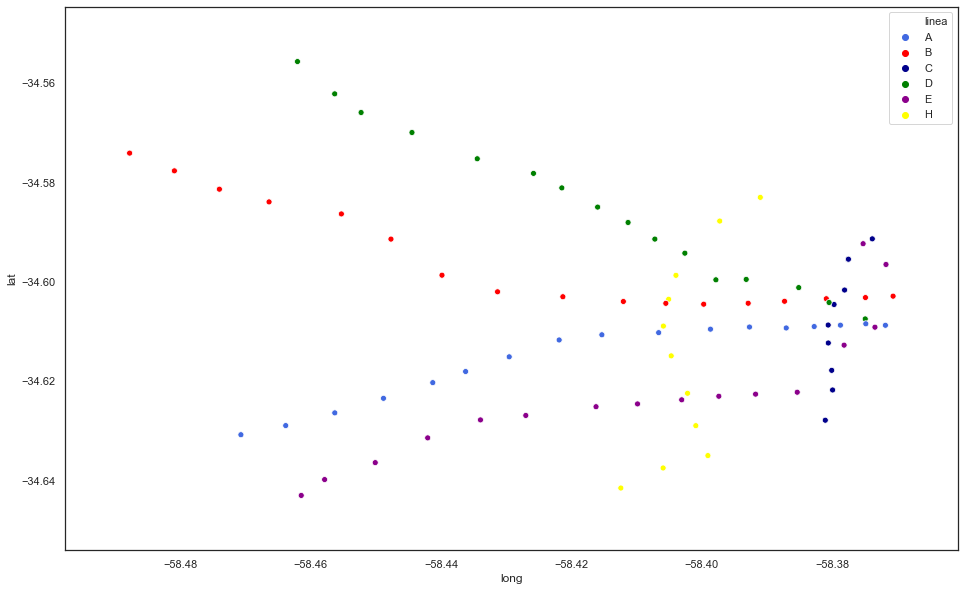

In [244]:
plt.figure(figsize=(16,10))
# Set your custom color palette
#customPalette = sns.set_palette(sns.color_palette(subte))
subte_color={"A":'royalblue',"B":'red',"C":'darkblue',"D":'green',"E":'darkmagenta',"H":'yellow'}
ax = sns.scatterplot(x='long', y='lat', data=subte[subte['numero_de_']==1], hue='linea',
                     hue_order=['A','B','C','D','E','H'], palette=subte_color)